# Cardio Catch Disease

## 0.0 Description

Cardio Catch Disease is company of heart disease detection at early stages. Its business model is a service — the company offers early heart disease diagnostics for a specific price.

The heart disease diagnostic is made manually by a team of specialists. The precision is between 55% and 65% because of the complecity of the diagnosis process, and the team's fatigue. The cost of each diagnostic, including equipement and payment sheet, is around $900,00.

The price of the diagnostics varies with the precision achived by the team of specialists. It works like this: for every 5% precision above 50%, the customer pays $500.00. If the diagnostic has a precision of 55%, the customer pays $500.00; for a precision of 60%, the customer has to pay $1000.00, and so on. If the precision is 50% or lower the customer doesn't have to pay.

The problem is that the team's precision is highly variable (range of 10%), making the business unstable. In the worst-case scenario (55% precision), the company has a $400.00 loss. In the best-case (65% precision), it has a $600.00 revenue.

Objective

The objective of this project is to develop a tool with better and more stable precision.

CEO Questions

1. What are the tool's precision and accuracy?
2. How much profit will the new tool implementation generate for the company?
3. What is the reliability of the results given by the tool?

# Plan


# CRISP
<p align='center'>
<img src='images/readme_fig/crisp.png' width=660>
</p>

## Business Understanding

Cardio Catch Disease is company of heart disease detection at early stages. Its business model is a service — the company offers early heart disease diagnostics for a specific price.

Currently, heart disease diagnosis is made manually by a team of specialist. The diagnostics precision is between 55% and 65% because of the complexity of the diagnosis process, and the team's fatigue that takes turns in shifts to minimize the risks. The cost of each diagnostics, including equipment and payment sheet, is around $1000,00.

Solution

Develop a tool to predict heart disease at early stages with a good and stable precision to bring more profit for the company.

Attribute|Description|Type|Unit
----|-------------------|-----|----------
age | Age | Objective Feature | int (days)
| height | Height | Objective Feature | int (cm) |
| weight | Weight | Objective Feature  |float (kg) |
| gender | Gender | Objective Feature  |categorical code |
| ap_hi | Systolic blood pressure | Examination Feature | int |
| ap_lo | Diastolic blood pressure | Examination Feature | int |
| cholesterol | Cholesterol | Examination Feature | 1: normal, 2: above normal, 3: well above normal |
| gluc | Glucose | Examination Feature  |1: normal, 2: above normal, 3: well above normal |
| smoke | Smoking | Subjective Feature | binary |
| alco | Alcohol intake | Subjective Feature  |binary |
| active | Physical activity | Subjective Feature | binary |
| cardio | Presence or absence of cardiovascular disease | Target Variable | binary |

For some informations about heart diseases see here:
[Cardio Vascular Diseases](#130-cardio-vascular-diseases)


# 0.0. Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from sklearn import model_selection as mselec
#from helper_functions import sum_table, stats_table, note_settings, blood_pressure_label, overweight_label, test_set, classifier_metrics, classifier_metrics_tuned, classifier_metrics_plot, classifier_confusion_matrix, classifiers_report, 

import helper_functions as hf
import scikitplot as skplt
import numpy as np
import scipy.stats as ss
import dataframe_image as dfi
from dataframe_to_image  import dataframe_to_image as dfimg

from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost
import catboost
from lightgbm import LGBMClassifier

from sklearn import metrics as met
import pandas_profiling as p_prof
from IPython.core.display import HTML
from IPython.display import Image
import statsmodels.stats.proportion as sp
from sklearn.pipeline import Pipeline
#from lazypredict.Supervised import LazyClassifier
import boruta

from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, RobustScaler, Normalizer, OneHotEncoder
from feature_engine import encoding as enc
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay
from confidenceintervals import conf_intervals as ci

## Optimization
import optuna
from optuna.samplers import TPESampler
from optuna.visualization.matplotlib import plot_optimization_history, plot_param_importances
import warnings
import ml_insights as mli
import pickle

In [99]:
import plotly.graph_objects as go
from plotly.graph_objects import Layout
def df_to_image(df, head_color, table_color):
    """Converts a DataFrame into a Figure

    Args:
        df (dataframe): pandas DataFrame
        head_color (str): Color of the head of the table
        table_color (str): Color of the table's cells
    """

    fig = go.Figure(data=go.Table(
        header=dict(values=list(df.columns),
                    fill_color=head_color,
                    align='center',
                    line_color='darkslategray',
                    font=dict(color='black', size=18)),
        cells=dict(values=[df[i] for i in df.columns.to_list()],
                    fill_color=table_color,
                    align='center',
                    line_color='darkslategray',
                    font=dict(color='black', size=16),
                    height=30),
        ), layout=Layout(paper_bgcolor='rgba(0,0,0,0)', width=2080, height=600))
    
    fig.show()
    fig.write_image('test.png')

In [3]:
hf.note_settings()

# 1.0. Data Loading

In [4]:
#df = pd.read_csv('data/cardio_train.csv', sep=';')
#df_train, df_test = mselec.train_test_split(df, test_size=0.15, random_state=42)
#df_train.to_csv('data/train.csv', index=False)
#df_test.to_csv('data/cardio_test.csv', index=False)


In [5]:
df_train = pd.read_csv('data/train.csv')


## 1.1. Rename Columns

In [6]:
# Col
new_cols = ['id', 'age', 'gender', 'height', 'weight', 'systolic_pressure', 'diastolic_pressure', 'cholesterol', 'glucose', 'smoke', 'alcohol_intake', 'active', 'cardio_disease']
df_train.columns = new_cols

# 2.0. Data Description

In [7]:
df1 = df_train.copy()

## 2.1. Data Dimension

In [8]:
print(f'Number of rows: {df1.shape[0]}')
print(f'Number of columns: {df1.shape[1]}')

Number of rows: 59500
Number of columns: 13


## 2.2. Data Types and Null Values

In [9]:
hf.sum_table(df1)

,Name,dtypes,Uniques,Missing,Missing %
0,id,int64,59500,0,0.0
1,age,int64,7961,0,0.0
2,gender,int64,2,0,0.0
3,height,int64,104,0,0.0
4,weight,float64,262,0,0.0
5,systolic_pressure,int64,149,0,0.0
6,diastolic_pressure,int64,152,0,0.0
7,cholesterol,int64,3,0,0.0
8,glucose,int64,3,0,0.0
9,smoke,int64,2,0,0.0


There are no missing value in the dataset.

## 2.1. Change Data types

In [10]:
# Converting age to years
df1['age'] = df1['age'].apply(lambda x: int(x/365))

## 2.3. Check Balance

In [11]:
df1['cardio_disease'].value_counts(normalize=True)

0    0.500824
1    0.499176
Name: cardio_disease, dtype: float64

The dataset is balanced in regard to the target variable.

## 2.4 Check Duplicates

In [12]:
df1.duplicated().sum()

0

## 2.5. Descriptive Statistics

In [13]:
hf.stats_table(df1)

,attributes,min,max,range,median,mean,std,var,skew,kurtosis
0,id,0.0,99999.0,99999.0,49912.0,49978.028992,28867.120393,8.333106e+08,0.001278,-1.199450
1,age,29.0,64.0,35.0,53.0,52.838420,6.767237,4.579550e+01,-0.305185,-0.815814
2,gender,1.0,2.0,1.0,1.0,1.348588,0.476527,2.270783e-01,0.635501,-1.596192
3,height,55.0,250.0,195.0,165.0,164.335445,8.185957,6.700990e+01,-0.593069,7.550477
4,weight,22.0,200.0,178.0,72.0,74.184291,14.366776,2.064042e+02,1.009502,2.567814
5,systolic_pressure,-140.0,14020.0,14160.0,120.0,128.866353,153.364263,2.352060e+04,82.902318,7132.093325
6,diastolic_pressure,0.0,11000.0,11000.0,80.0,97.182571,197.005223,3.881106e+04,31.722394,1358.053661
7,cholesterol,1.0,3.0,2.0,1.0,1.365395,0.678919,4.609312e-01,1.592994,1.015523
8,glucose,1.0,3.0,2.0,1.0,1.225328,0.570513,3.254850e-01,2.405386,4.339785
9,smoke,0.0,1.0,1.0,0.0,0.088319,0.283761,8.052038e-02,2.901698,6.420066


In [100]:
df_to_image(hf.stats_table(df1), head_color='royalblue', table_color='snow')

## 2.5.1 Histogram before data filtering.

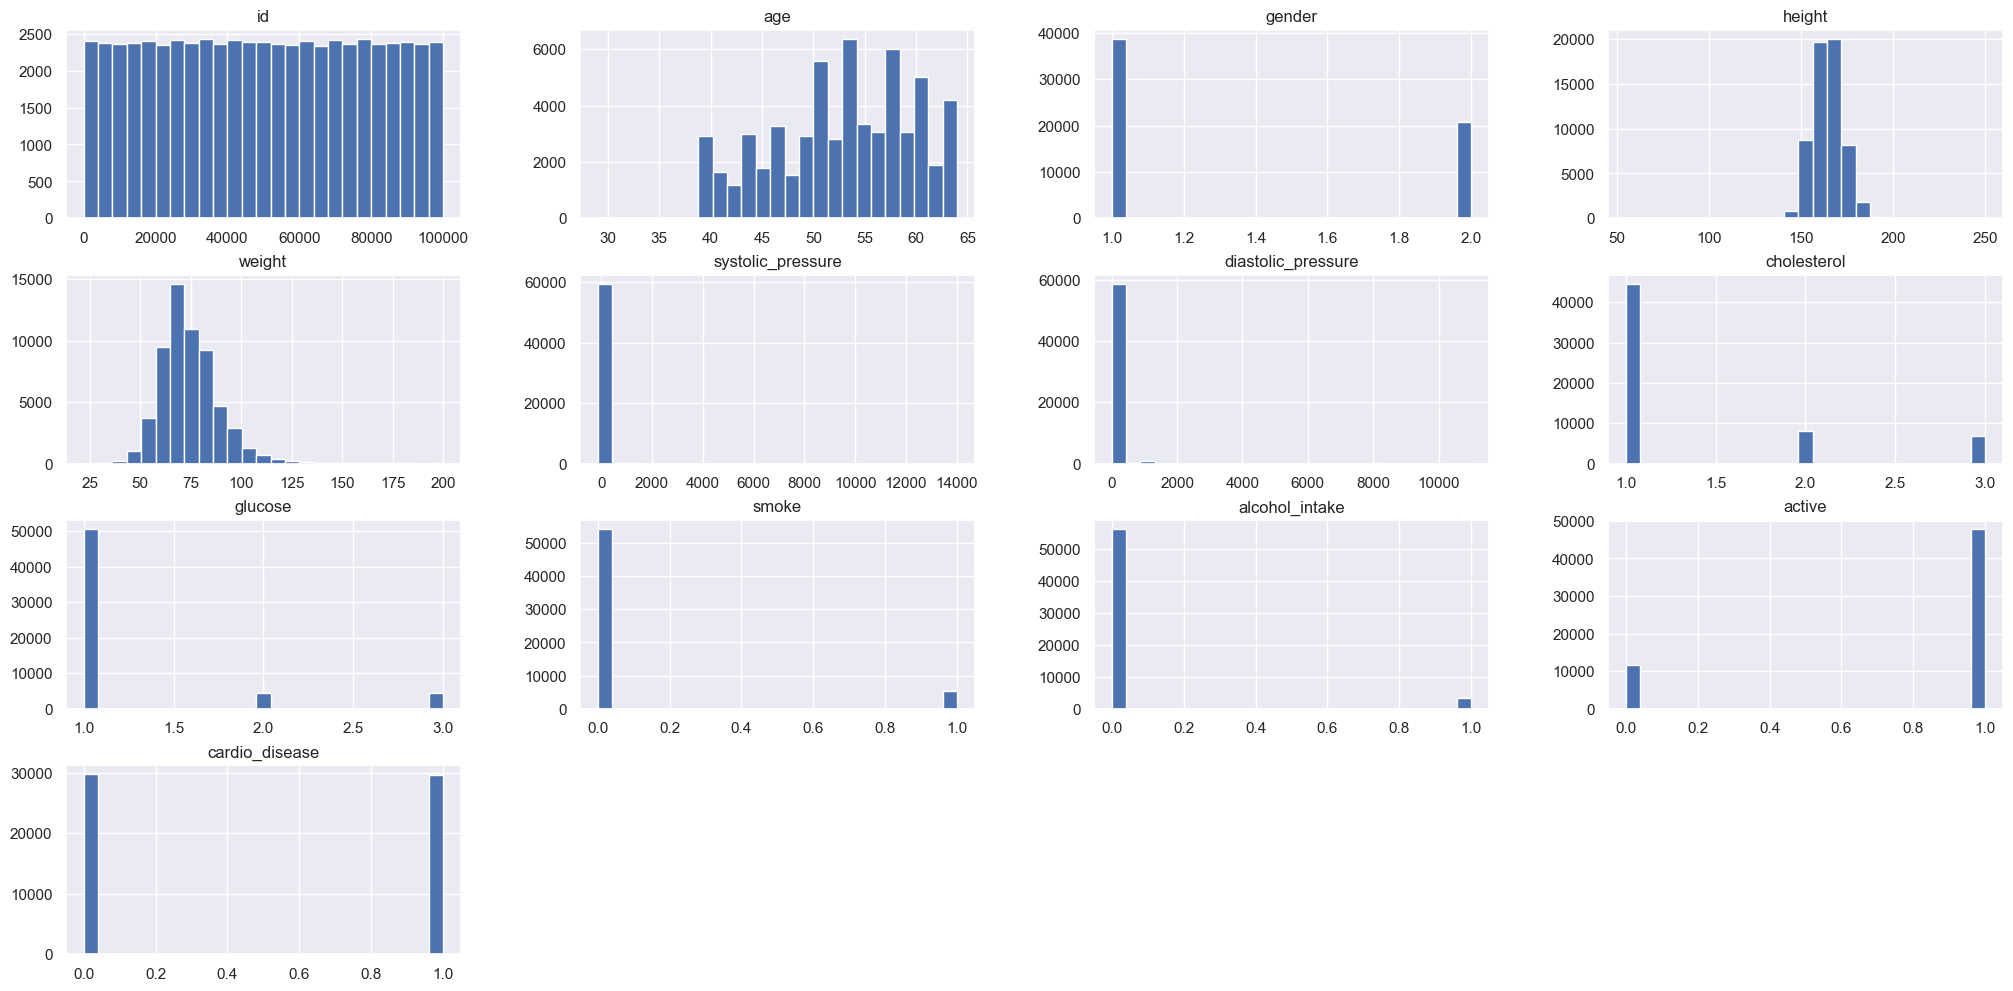

In [15]:
df1.hist(bins=25);

**Age**

We can see that there are only adults in our dataset (29-64 years).

**Height**

The minimum height is 55cm, and maximum is 250cm. Although both of these values are possible, they are extremely rare for an adult person.

**Weight** 

The minimum weight is 22kg which is really strange for an adult.

**Systolic blood pressure**

We have values below zero and above 14000, which are not possible.

**Diastolic blood pressure**

We have zero as the minimum value and the maximum 11000, which are not possible.

# 3.0. Feature Engineering

In [16]:
df2 = df1.copy()

## 3.1 Hypothesis

<img src='images/Heart_Disease.png'>

**H1:** A proporção de pessoas com doença cardiovascular é 30% maior entre pessoas com mais de 40 anos.

**H2:** Pessoas que estão acima do peso correspondem a 30% das pessoas com problema cardíaco.

**H3:** Most people with cardio disease also have a high cholesterol level.

**H4:** 50% of the people with heart disease smoke and have a high cholesterol level.

**H5:** People with higher levels of glucose have, on average, a higher systolic blood pressure.

**H6:** Os homens compõem mais de 60% das pessoas com problema de coração.

**H7:** 60% das pessoas que consomem álcool regularmente, tem níveis de glicose muito acima do normal.

**H8:** A proporção de mulheres acima dos 60 que têm alguma doença vascular é maior do que a dos homens nessa idade.

**H9:** Das pessoas com problemas cardíacos, 65% tem pressão sistólica alta.

**H10:** 80% das pessoas que fumam, bebem, têm níveis de glicose e colesterol altos apresentam problemas cardíacos.

**H11:** As pessoas que consomem álcool e fumam tem uma proensão 50% maior de ter alguma doença cardíaca do que as pessoas que não bebem nem fumam.




## 3.1 New Features for EDA

In [17]:
# Body mass Index
df2['bmi'] = df2['weight']/(df2['height']/100)**2

# Weight Consition
df2['weight_condition'] = df2['bmi'].apply(lambda x: hf.overweight_label(x))

#  Blood Pressure Level
df2['blood_pressure_level'] = df2[['systolic_pressure', 'diastolic_pressure']].apply(lambda x: hf.blood_pressure_label(x['systolic_pressure'], x['diastolic_pressure']), axis=1)

# Cholesterol and Glucose
levels = {1: 'normal', 2: 'above_normal', 3:'well_above_normal'}

df2['cholesterol'] = df2['cholesterol'].map(levels)
df2['glucose'] = df2['glucose'].map(levels)

df2['gender'] = df2['gender'].apply(lambda x: 'male' if x == 2 else 'female')

In [18]:
df2.head()

,id,age,gender,height,weight,systolic_pressure,diastolic_pressure,cholesterol,glucose,smoke,alcohol_intake,active,cardio_disease,bmi,weight_condition,blood_pressure_level
0,88308,48,male,178,110.0,140,80,normal,normal,0,0,1,0,34.717839,obesity_class1,high_stage_1
1,25750,59,female,165,60.0,110,70,normal,normal,0,0,1,1,22.038567,healthy,normal
2,17970,56,female,172,70.0,120,80,normal,normal,0,0,1,0,23.661439,healthy,normal
3,48020,55,female,159,73.0,120,80,normal,normal,0,0,1,1,28.875440,overweight,normal
4,55576,54,female,162,66.0,110,60,normal,normal,0,0,1,0,25.148605,overweight,normal


# 4.0. Data Filtering

In [19]:
df3 = df2.copy()

## 4.1 Filter Rows

We are going to remove the some instances based on the follwion criterion:

- Diastolic presure lower than 50mmHg and higher than 140mmHg. 

- Systolic Pressure above 250mmHg and below 60mmHg.

These values can only occur in extreme conditions, which is not the case in this dataset.
    

- Instances where the systolic pressure is lower than diastolic pressure (this scenario is not possible).

- Instances where the height is lowe than 65.24cm - height of the smallest person on earth.

In [20]:
df3 = df3.query('diastolic_pressure <= 140 & diastolic_pressure > 50')
df3 = df3.query('systolic_pressure <= 250 & systolic_pressure >= 80')
df3 = df3.query('systolic_pressure > diastolic_pressure')
df3 = df3.query('height > 65.24')

In [21]:
df3['cardio_disease'].value_counts(normalize=True)

0    0.505644
1    0.494356
Name: cardio_disease, dtype: float64

In [22]:
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
id,58288.0,49975.264840,28857.408123,0.000000,25016.750000,49907.000000,74962.250000,99999.000000
age,58288.0,52.827975,6.768854,29.000000,48.000000,53.000000,58.000000,64.000000
height,58288.0,164.353332,8.100320,67.000000,159.000000,165.000000,170.000000,250.000000
weight,58288.0,74.107877,14.307314,22.000000,65.000000,72.000000,82.000000,200.000000
systolic_pressure,58288.0,126.701928,16.658397,80.000000,120.000000,120.000000,140.000000,240.000000
diastolic_pressure,58288.0,81.343930,9.345484,52.000000,80.000000,80.000000,90.000000,140.000000
smoke,58288.0,0.088183,0.283563,0.000000,0.000000,0.000000,0.000000,1.000000
alcohol_intake,58288.0,0.054128,0.226272,0.000000,0.000000,0.000000,0.000000,1.000000
active,58288.0,0.803407,0.397425,0.000000,1.000000,1.000000,1.000000,1.000000
cardio_disease,58288.0,0.494356,0.499972,0.000000,0.000000,0.000000,1.000000,1.000000


# 5.0. EDA

In [23]:
df4 = df3.copy()

## 5.1. Univariate Analysis

In [24]:
hf.stats_table(df4)

,attributes,min,max,range,median,mean,std,var,skew,kurtosis
0,id,0.000000,99999.000000,99999.000000,49907.000000,49975.264840,28857.408123,8.327500e+08,0.001470,-1.199014
1,age,29.000000,64.000000,35.000000,53.000000,52.827975,6.768854,4.581739e+01,-0.304425,-0.816760
2,height,67.000000,250.000000,183.000000,165.000000,164.353332,8.100320,6.561518e+01,-0.383852,5.046324
3,weight,22.000000,200.000000,178.000000,72.000000,74.107877,14.307314,2.046992e+02,1.008922,2.574599
4,systolic_pressure,80.000000,240.000000,160.000000,120.000000,126.701928,16.658397,2.775022e+02,0.938814,1.825492
5,diastolic_pressure,52.000000,140.000000,88.000000,80.000000,81.343930,9.345484,8.733807e+01,0.354492,1.452189
6,smoke,0.000000,1.000000,1.000000,0.000000,0.088183,0.283563,8.040799e-02,2.904690,6.437444
7,alcohol_intake,0.000000,1.000000,1.000000,0.000000,0.054128,0.226272,5.119884e-02,3.941171,13.533291
8,active,0.000000,1.000000,1.000000,1.000000,0.803407,0.397425,1.579468e-01,-1.526917,0.331487
9,cardio_disease,0.000000,1.000000,1.000000,0.000000,0.494356,0.499972,2.499724e-01,0.022580,-1.999559


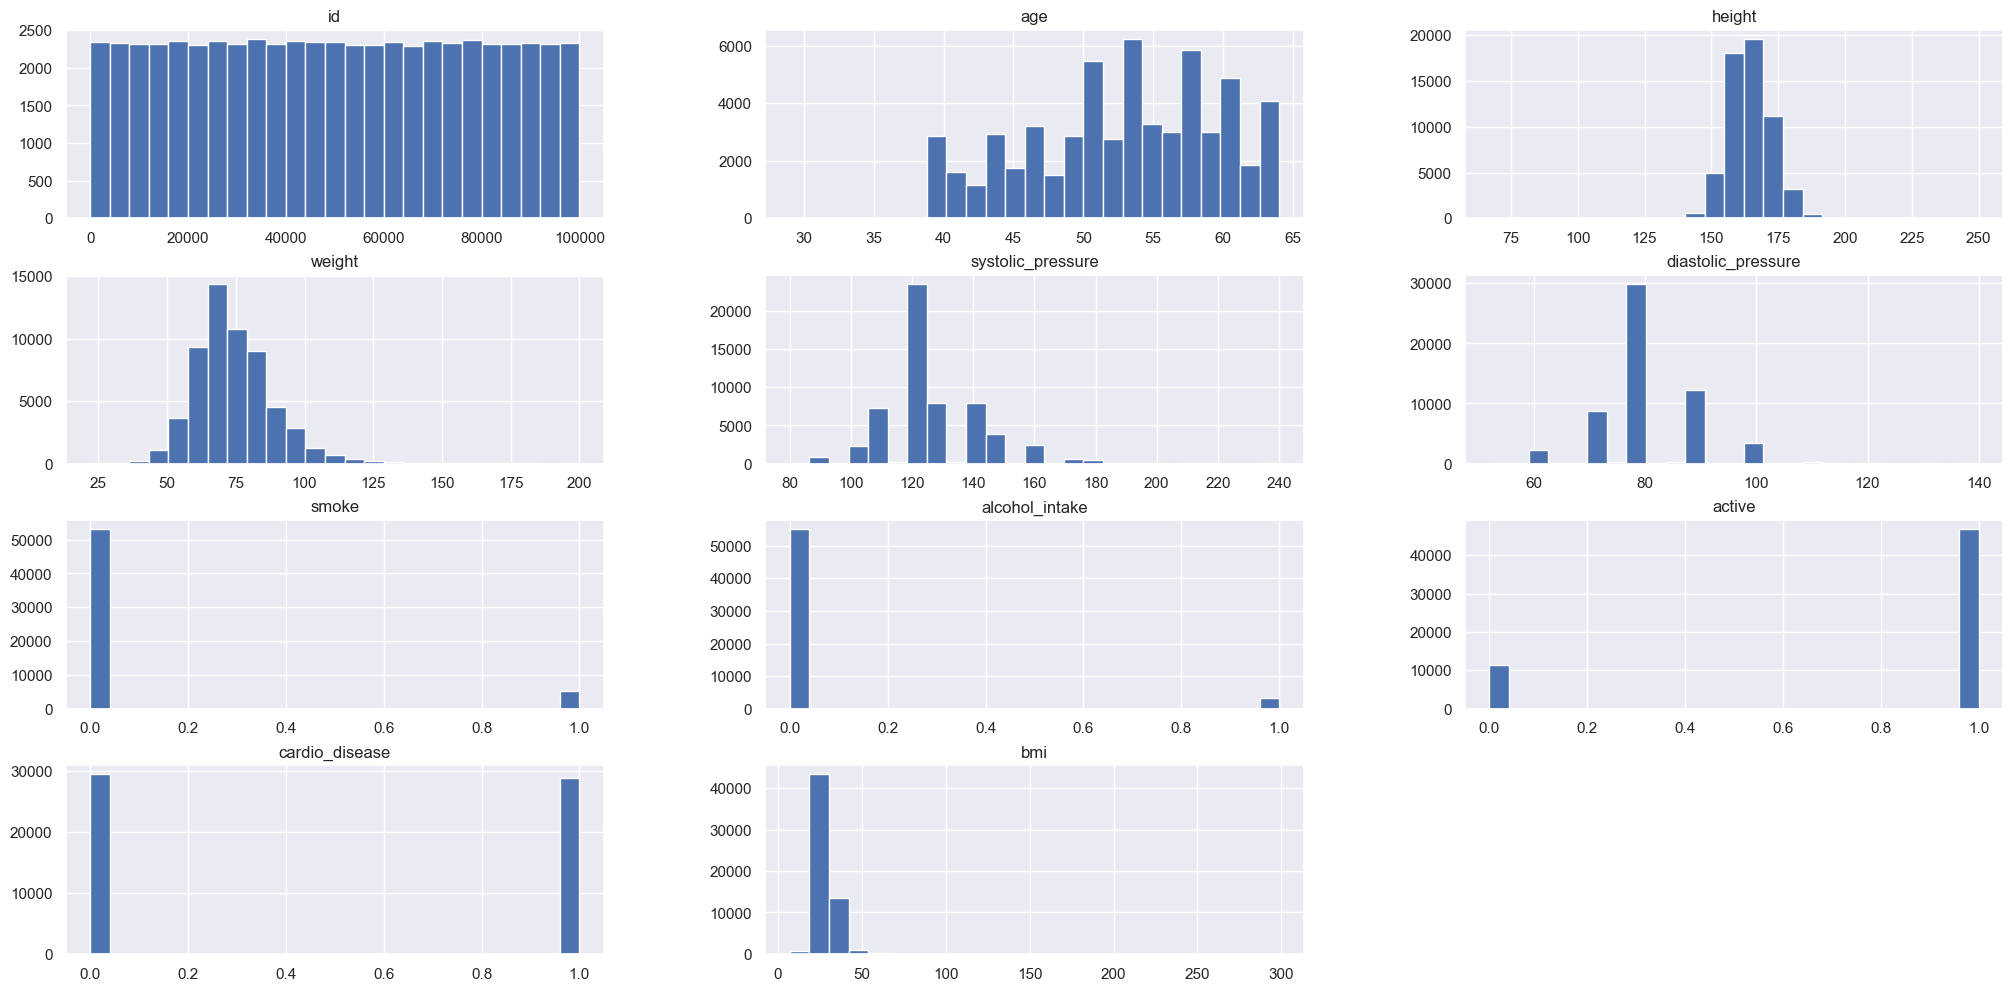

In [25]:
df4.select_dtypes(include=['int64', 'float64']).hist(bins=25);

<AxesSubplot:>

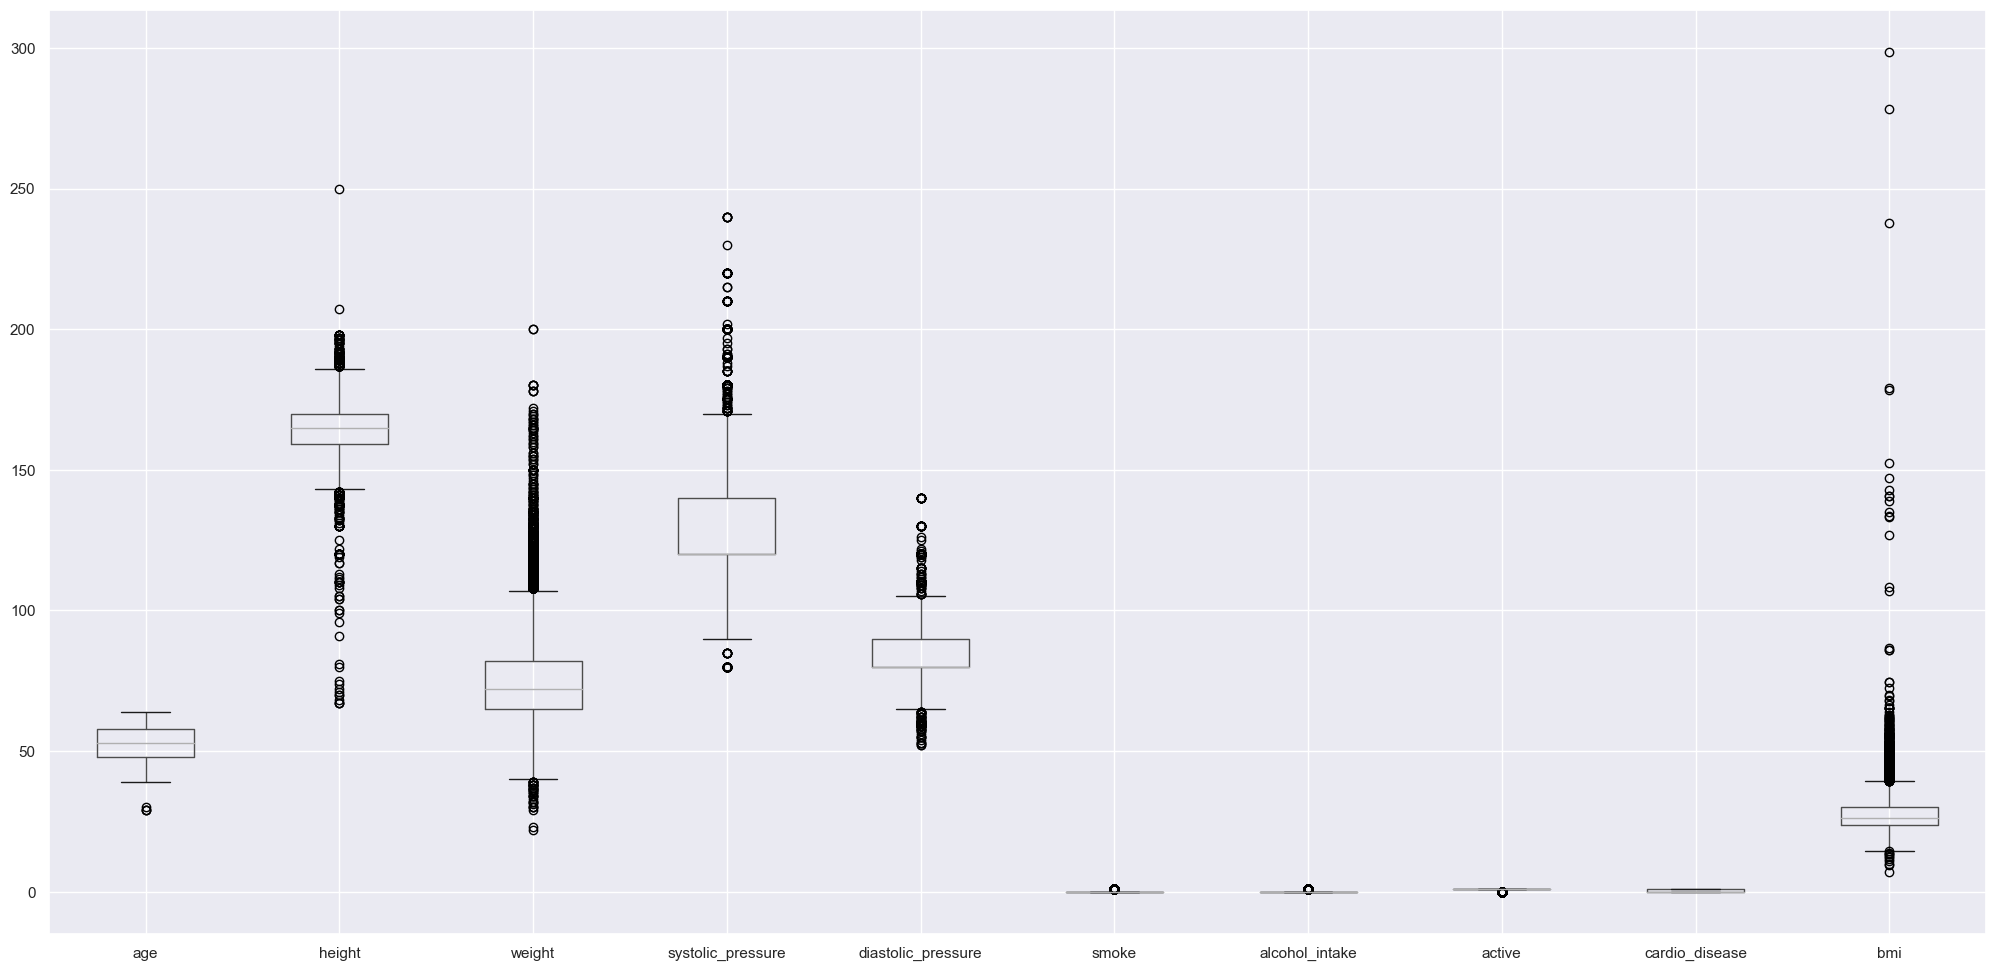

In [26]:
df4.select_dtypes(include=['int64', 'float64']).drop('id', axis=1).boxplot()

As an experimentation, for this project, I will use pandas profiling to do the univariate analysis.

In [27]:
df_aux = df4.reset_index(drop=True)
profile = p_prof.ProfileReport(df_aux.drop(['id'], axis=1), title='Cardio Catch Disease Report')

In [28]:
profile.to_widgets()

**Age**

min 29 - max 64

Normal distribution left skewed distribution with values between 29 and 64.

Concentration on 50 to 55 age range.

mild correlation with systolic pressure and cardio disease

**Gender**

65.2% 5 males, 34.8% females.

High correlation with height

Mild correlation with smoke

**Height**

min -> 55cm, max -> 250cm, mean -> 164,34.

Normal distribution with a high kurtosis (thin bell shape).

High correlation with weight 

**Weight**

min -> 22, max -> 200, mean -> 74.1.

Normal distribution with a small right skeweness.

Average correlation with systolic and diastolic pressure (pressure level), cholesterol 

**Systolic Pressure**

min -> 70, max -> 240, mean -> 126.68 

Most common value is 120.

High correlation with diastolic pressure and cardio disease

Average correlation with cholesterol

**Diastolic Pressure**

min -> 45, max -> 140, mean 81.31.

Normal distribution with small skeweness.

High correlation with cardio disease

Mild correlation with cholesterol


**Cholesterol**

Majority of people have a normal level of cholesterol (75.10%)

High correlation with glucose level

Mild correlation with cardio disease

**Glucose**

85.1% of people have a normal level of guclose.

**Smoke** 

The majority of people don't smoke (91.20%)

**Alcohol Intake**

Almost 95% of the people doesn't cosume alcohol.

High correlation with smoke

**Acvtive**

80% are active people.

**Cardio Disease**

Almost perfectly balance — 50.6% doesn't have cardio disease.

High correlation with blood pressure level

Average correlation with weight condition

**IMC**

Min 7.02, max -> 298.64

Right skewed distribution

High kurtosis (thin distribution shape).

Mild correlation with cardio disease

**Weight Condition**

71% of people are overweighted or obese.

**Blood Pressure Level**

43.10% of the people have high blood pressure.

## 5.2. Bivariate Analysis

### 5.2.1 Hypothesis Validation

In [29]:
df_disease = df4.query('cardio_disease != 0')
df_no_disease = df4.query('cardio_disease == 0')

**H1:** The proportion of people with cardio disease is 30% higher among people older than 50.

FALSE: The proportion of people above 50 years old and that have heart disease is 14% higher than the overall proportion, and 54.9% higher than those below 50 years old.

Text(0.5, 0, 'Age')

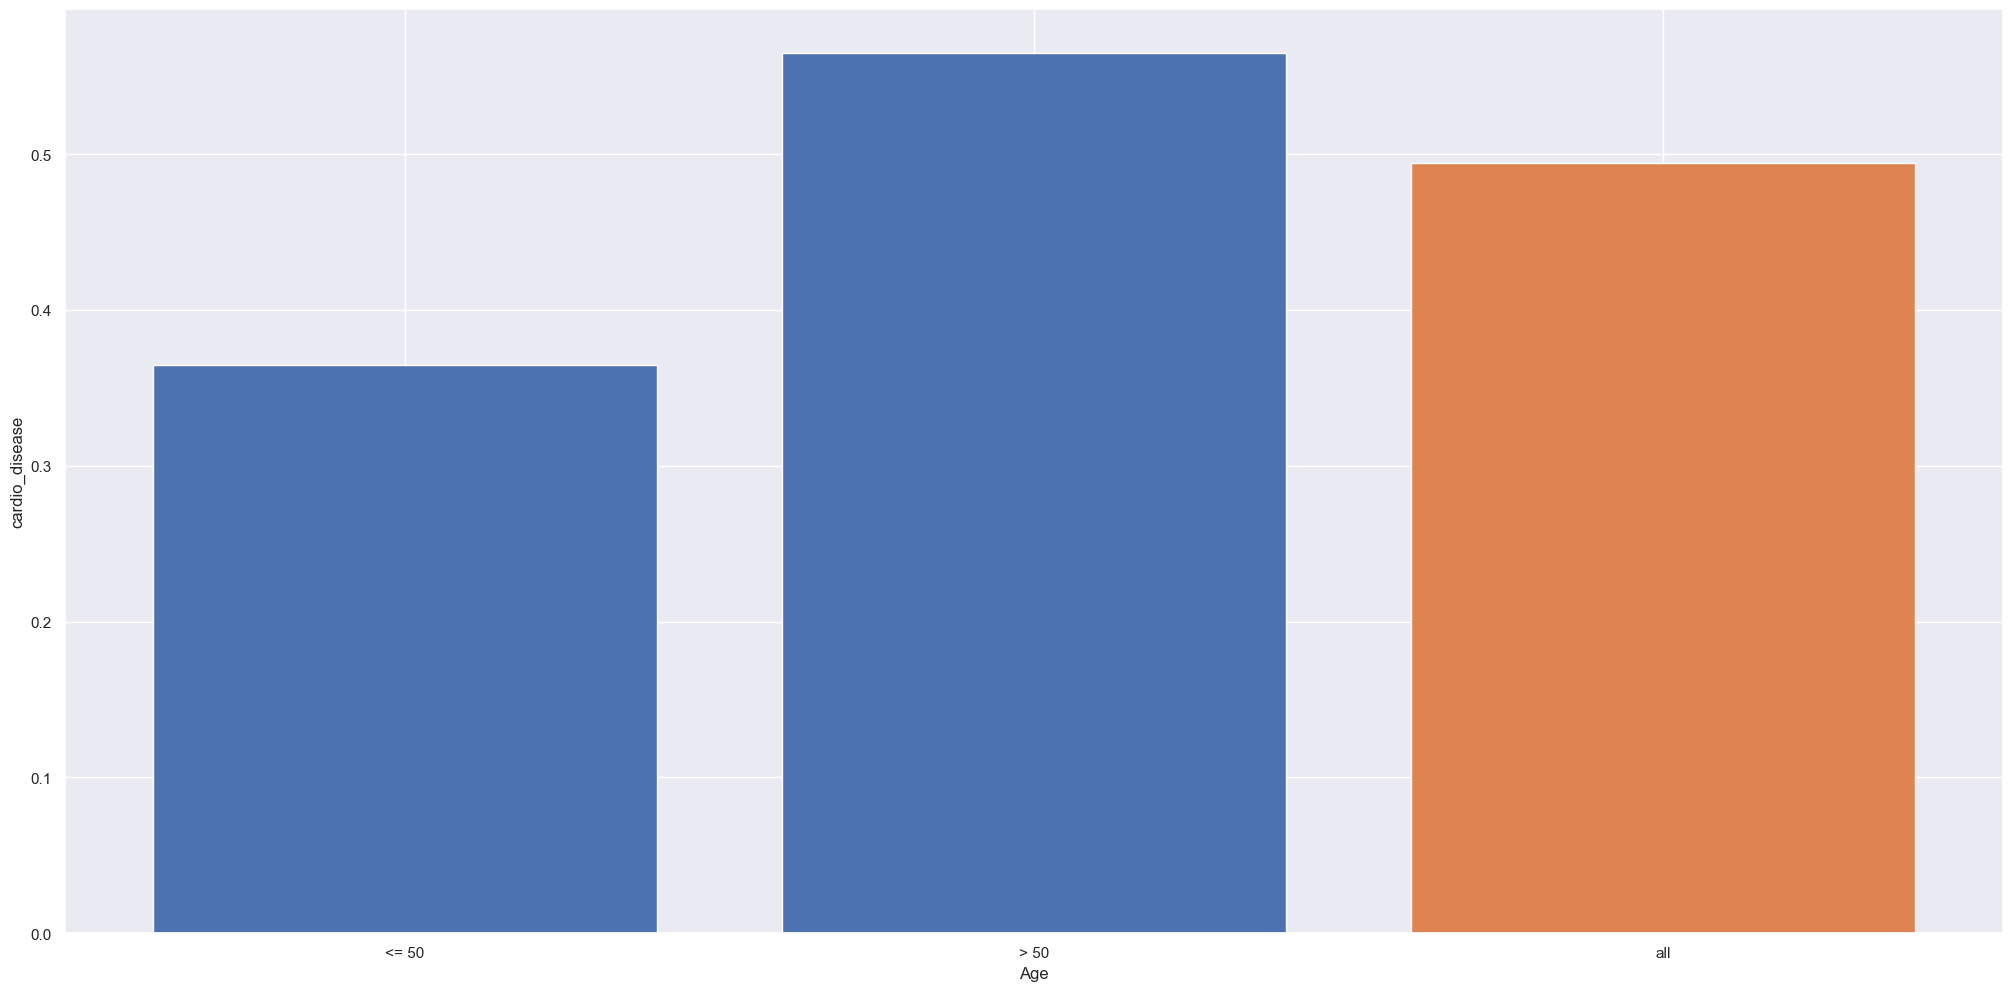

In [30]:
df_aux = df4.copy()
df_aux['age_class'] = df4.age.apply(lambda x: '> 50' if x > 50 else '<= 50')
prop_by_age = df_aux[['age_class', 'cardio_disease']].groupby('age_class').mean()
general_prop = df4['cardio_disease'].mean()
#df_aux = pd.concat([prop_by_age, pd.Series({'all': general_prop}, name='cardio_disease_2').to_frame()], axis=1)
#df_aux[['cardio_disease']].combine_first(df_aux[['cardio_disease_2']])

plt.bar(x=prop_by_age.index, height='cardio_disease', data=prop_by_age)
plt.bar(x='all', height=general_prop)
plt.ylabel('cardio_disease')
plt.xlabel('Age')

**H2:** Overweight people correspond to 30% of the patients with heart disease.

TRUE: Approximately 36% o people with heart disease, but we have a similar proportion for people who don't have a cardio disease.

Text(0.5, 1.0, 'People with heart disease')

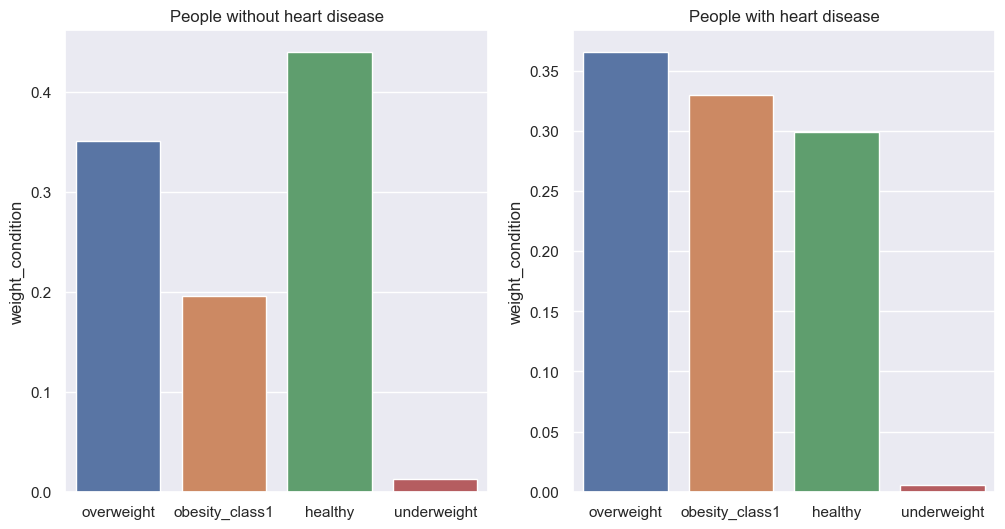

In [31]:
df_plot = df_disease.weight_condition.value_counts(normalize=True).to_frame()
df_aux = df_no_disease.weight_condition.value_counts(normalize=True).to_frame()
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=df_aux.index, y=df_aux.weight_condition, order=df_plot.index)
plt.title('People without heart disease')
plt.subplot(1, 2, 2)
sns.barplot(x=df_plot.index, y=df_plot.weight_condition)
plt.title('People with heart disease')

Over 36% of people with heart disease are overweight. Of those who don't have heart disease, approximately 35% are overweight. The most significant difference is in the proportion of obese people: below 20% of people without heart disease are obese, and above 30% of people with heart disease are obese.

**H3:** Most people with cardio disease also have a high cholesterol level.

FALSE: Most people  with heart disease have a normal cholesterol level. But the percentage of people with high cholesterol level is higher in the group of people with heart disease than the proportion of people that doesn't have heart disease.

<AxesSubplot:ylabel='cholesterol'>

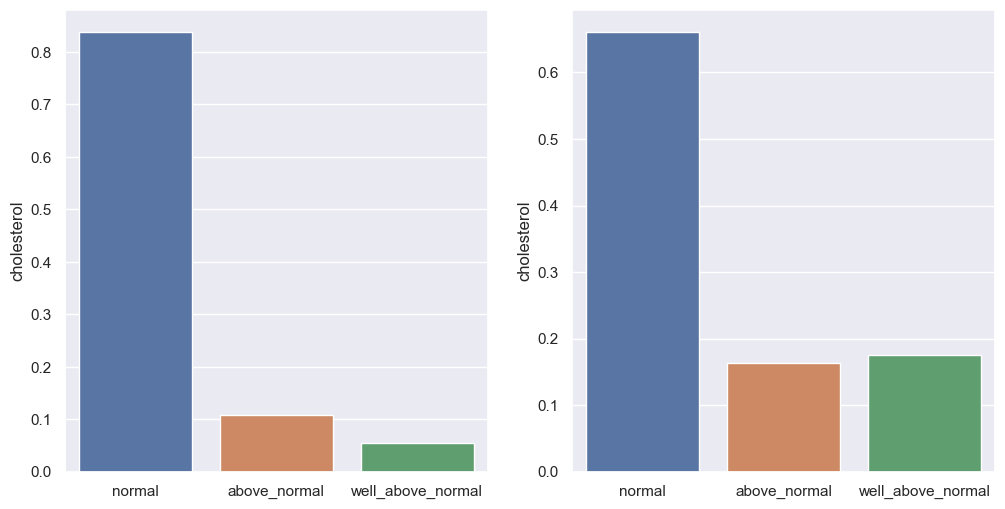

In [32]:
df_no_cardio = df_no_disease.cholesterol.value_counts(normalize=True).to_frame()
df_aux = df_disease.cholesterol.value_counts(normalize=True).to_frame()
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=df_no_cardio.index, y=df_no_cardio.cholesterol)
plt.subplot(1, 2, 2)
sns.barplot(x=df_aux.index, y=df_aux.cholesterol, order=df_no_cardio.index)

**H4:** 50% of the people with heart disease smoke and have a high cholesterol level.

False: Most people with heart disease neither smoke nor have a high cholesterol level.

Text(0.5, 1.0, 'People with heart disease')

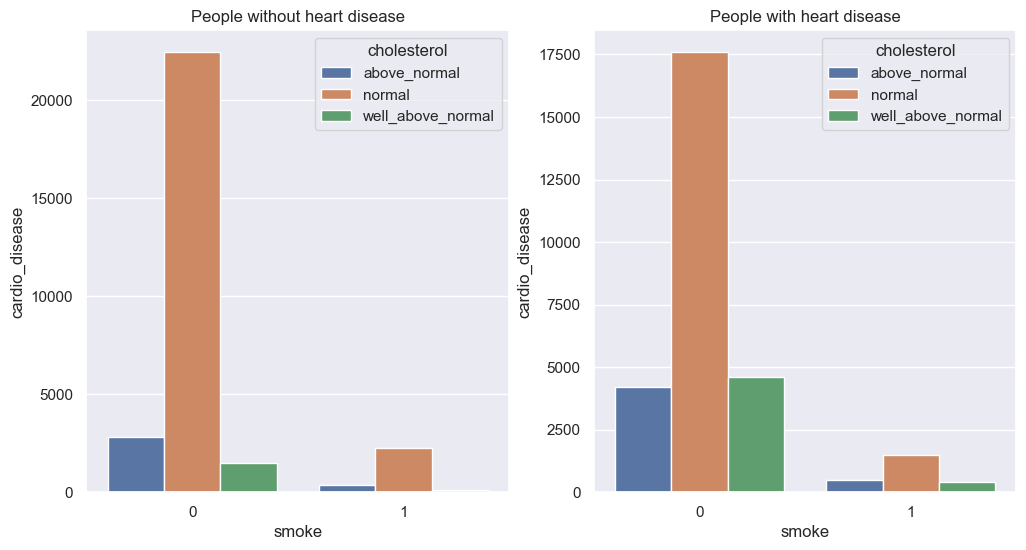

In [33]:
df_no_dis = df_no_disease[['smoke', 'cardio_disease', 'cholesterol']].groupby(['smoke', 'cholesterol']).count().reset_index()
df_dis = df_disease[['smoke', 'cardio_disease', 'cholesterol']].groupby(['smoke', 'cholesterol']).count().reset_index()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=df_no_dis.smoke, y=df_no_dis.cardio_disease, hue=df_no_dis.cholesterol)
plt.title('People without heart disease')
plt.subplot(1, 2, 2)
sns.barplot(x=df_dis.smoke, y=df_dis.cardio_disease, hue=df_dis.cholesterol)
plt.title('People with heart disease')

**H5:** People with higher levels of glucose have an average of 130mmHg of systolic blood pressure.

TRUE: The average systolic pressure of people with a high glucose level is a little bit higher than 130mmHg

<AxesSubplot:xlabel='glucose', ylabel='systolic_pressure'>

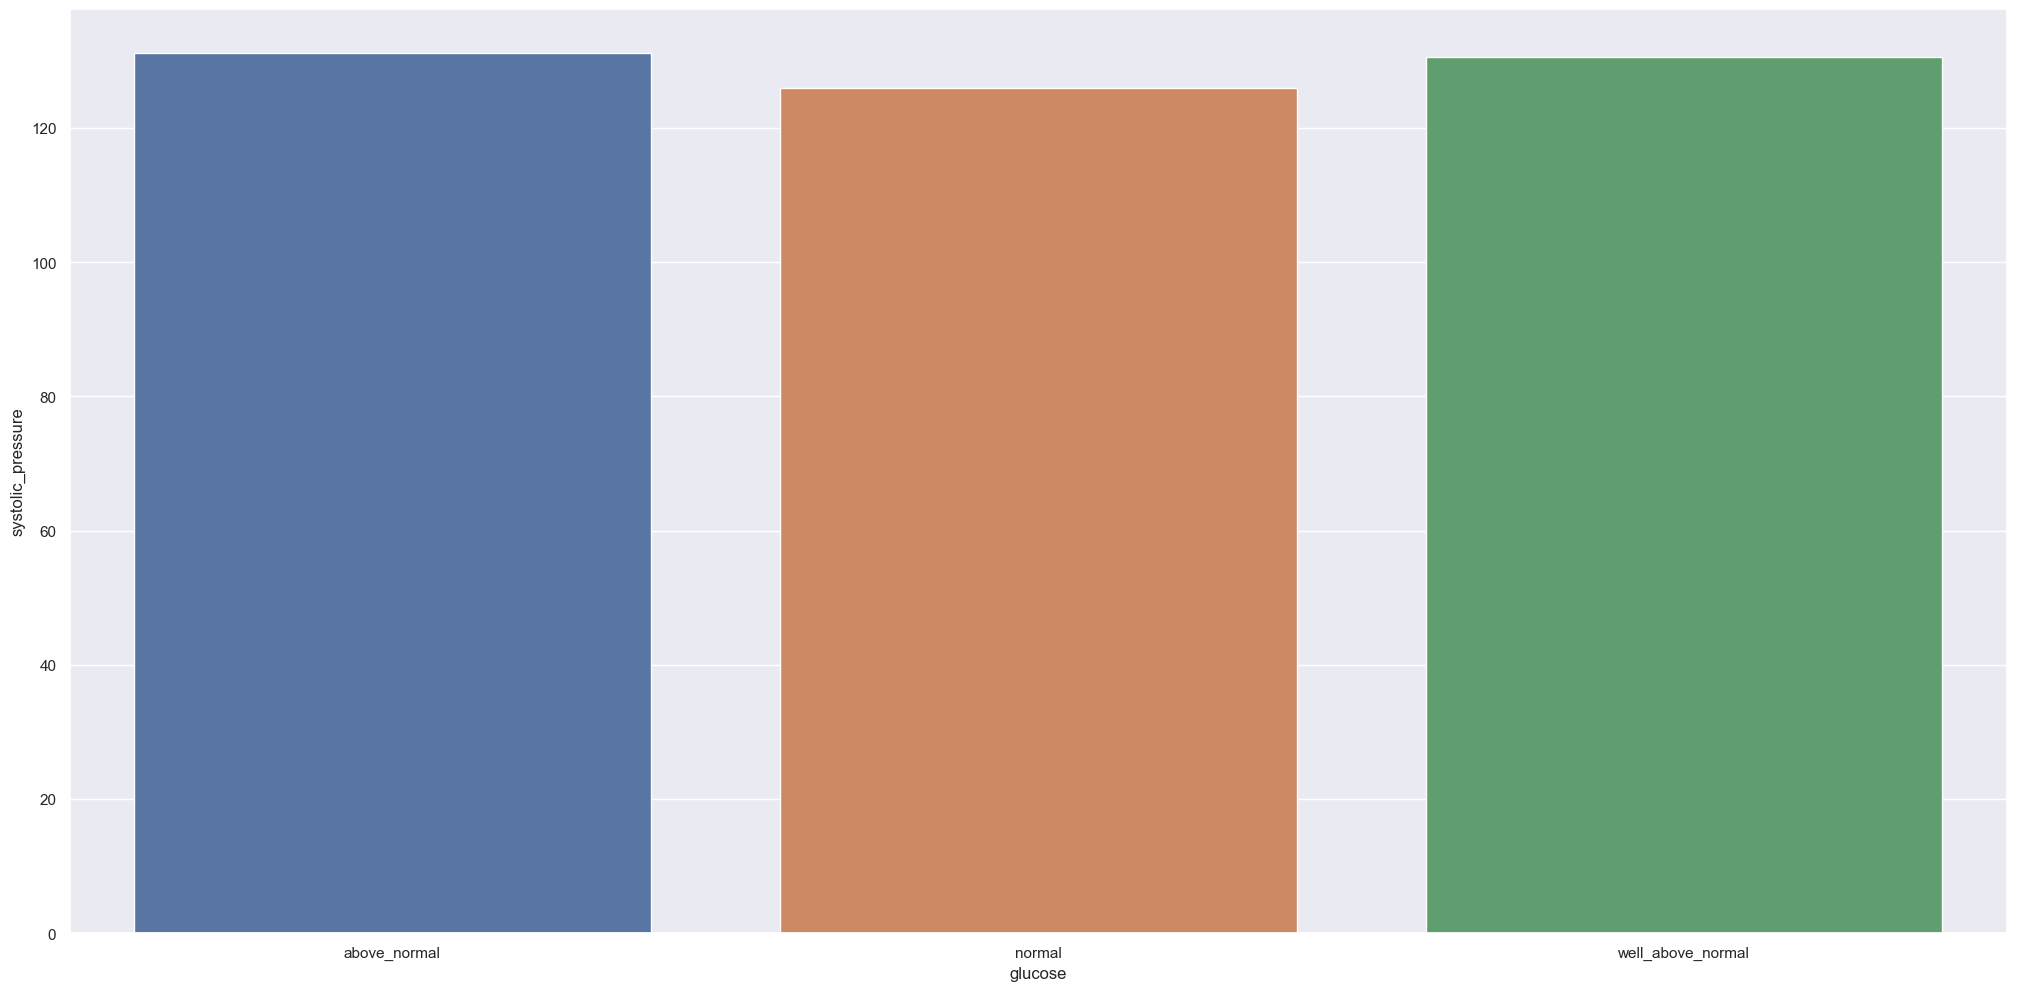

In [34]:
plot_df = df4[['glucose', 'systolic_pressure']].groupby('glucose').mean()
sns.barplot(x=plot_df.index, y=plot_df.systolic_pressure)

**H6:** Men have more chance of having heart disease.

FALSE: The proportion of males is higher, but it is very close to the percentage of females — the edges of the confidence intervals overlap, which means that the rates are not significantly different.

<BarContainer object of 2 artists>

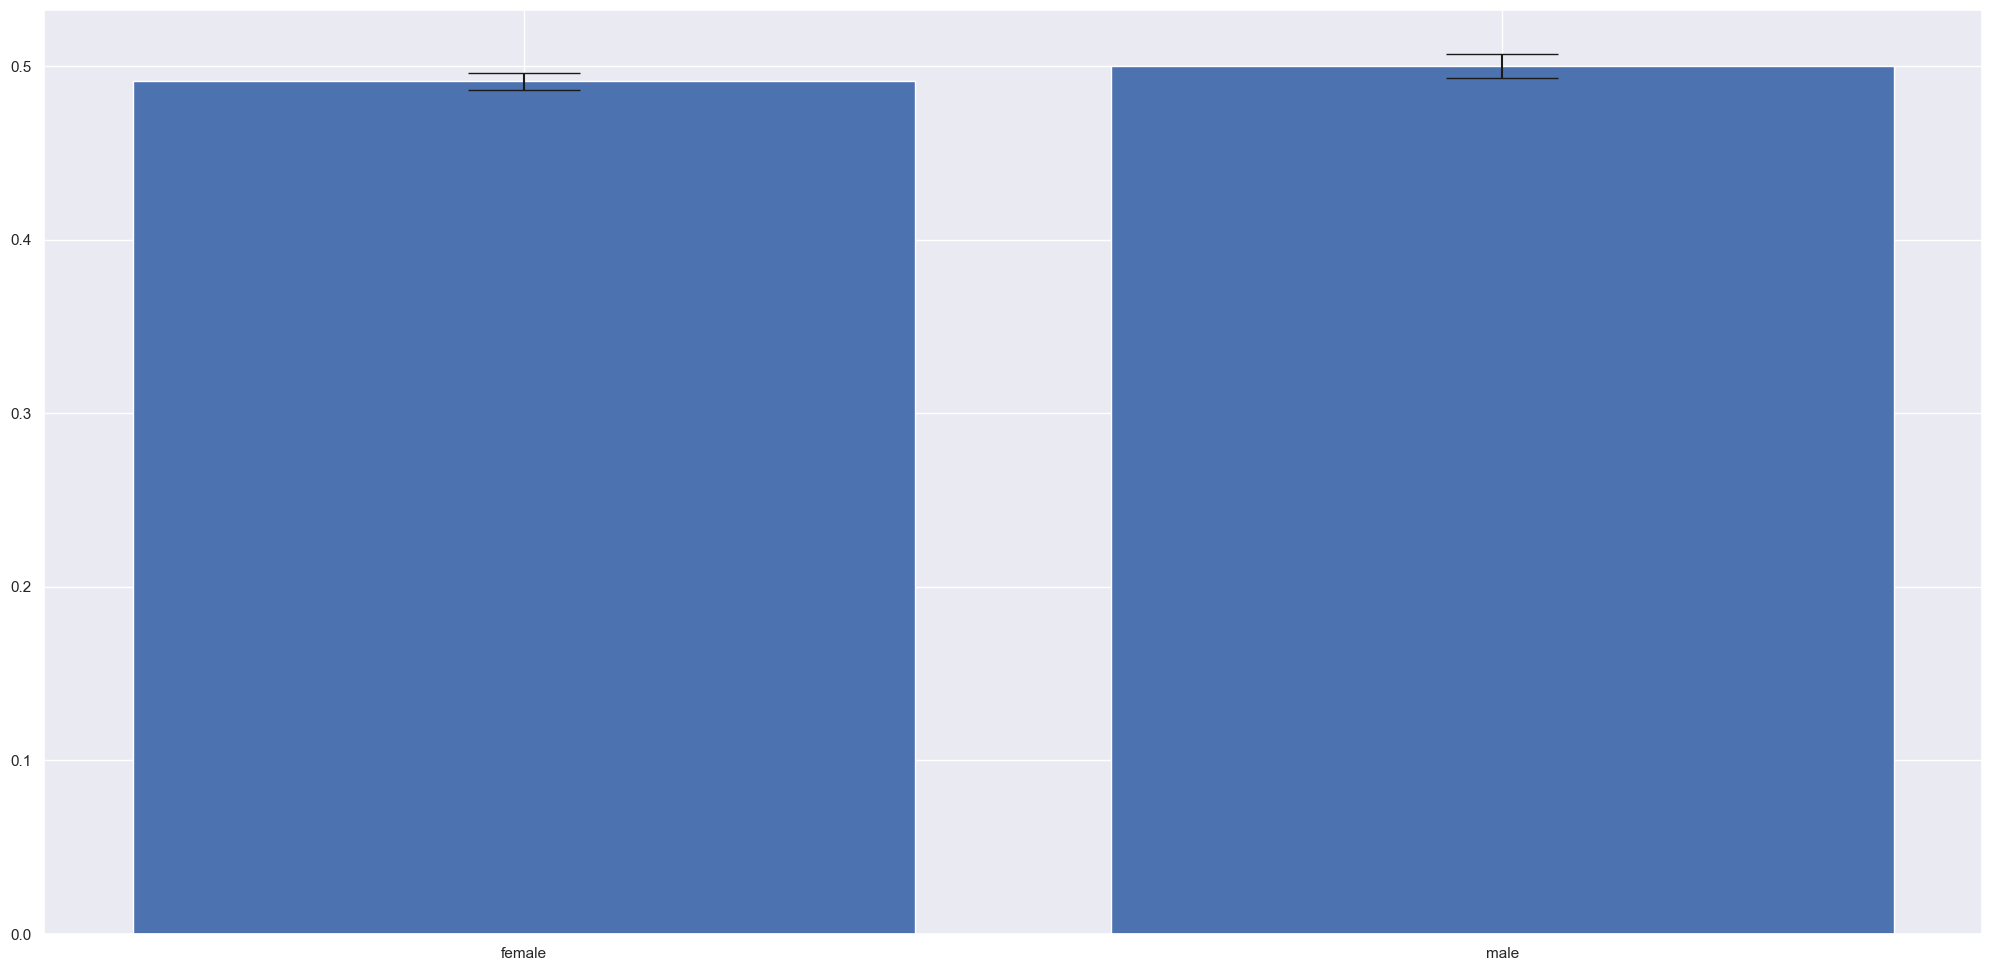

In [35]:
summ_aux = df4.copy()
summary = summ_aux[['gender', 'cardio_disease']].groupby('gender').agg({'gender': 'count', 'cardio_disease': ['sum', 'mean']})
intervals = sp.proportion_confint(summary[('cardio_disease', 'sum')], summary[('gender', 'count')], method='wilson')

summary['lo_conf'] = intervals[0]
summary['hi_conf'] = intervals[1]

summary['lo_int'] = summary[('cardio_disease', 'mean')] - summary['lo_conf']
summary['hi_int'] = summary['hi_conf'] - summary[('cardio_disease', 'mean')]

n_category = summary.shape[0]
plt.bar(x=summary.index, height=summary[('cardio_disease', 'mean')], yerr=summary[['lo_int', 'hi_int']].T.values, capsize=80/n_category)

Here we plotted a proportion graphic with a confidence interval using the Wilson method.

The Wilson method is an improvement over the normal approximation interval. The score interval is asymmetric, doesn't have problems of overshoot and zero-width intervals, and can be safely employed with small samples and skewed observation.

**H7:** 60% of people that consumes alcohol regularly have glucose level well above normal.

FALSE: 80% of the people who consume alcohol have normal glucose levels.

<AxesSubplot:ylabel='glucose'>

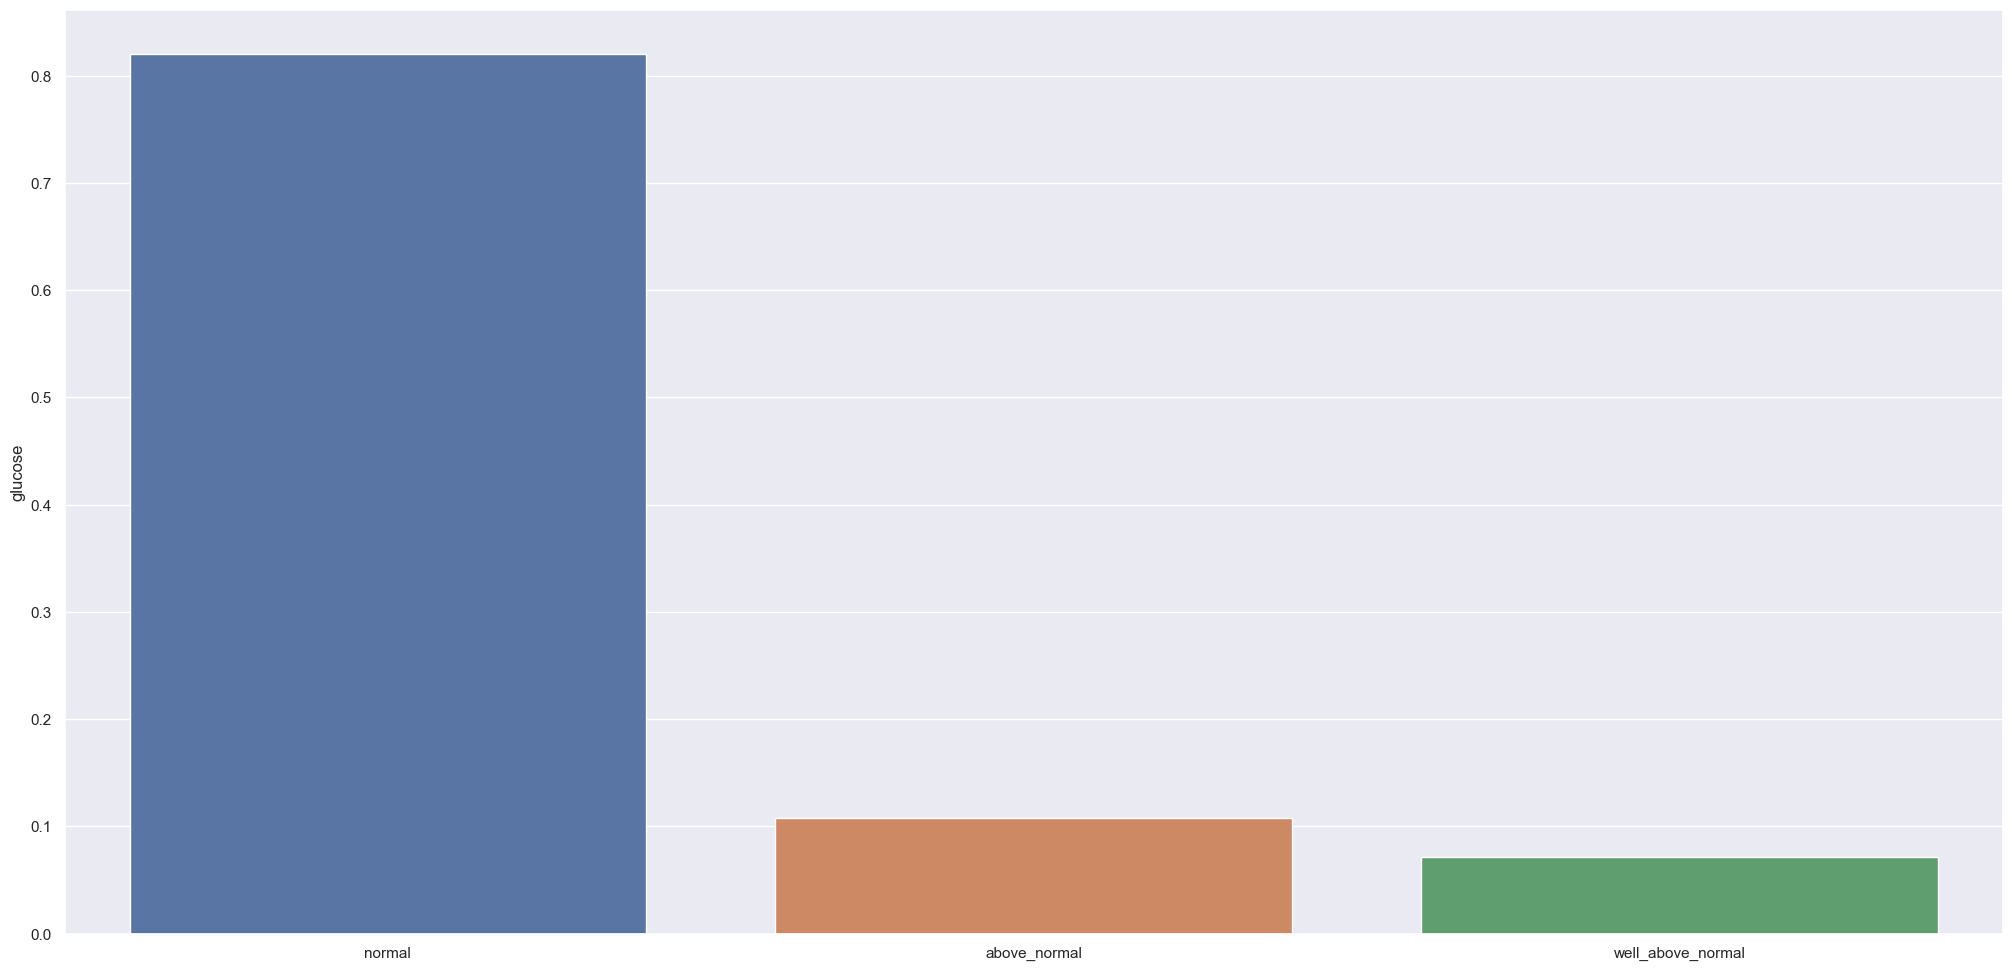

In [36]:
df_alch = df4.query('alcohol_intake == 1')['glucose'].value_counts(normalize=True).to_frame()
df_alch
sns.barplot(x=df_alch.index,y='glucose', data=df_alch)

**H8:** The proportion of females above 60 years old with heart disease is higher than the percentage of males of that age.

TRUE: The proportion of females with heart disease is higher than males, and the confidence intervals don't overlap.

Obs: We have 8175 instances with more than 60 years.

<BarContainer object of 2 artists>

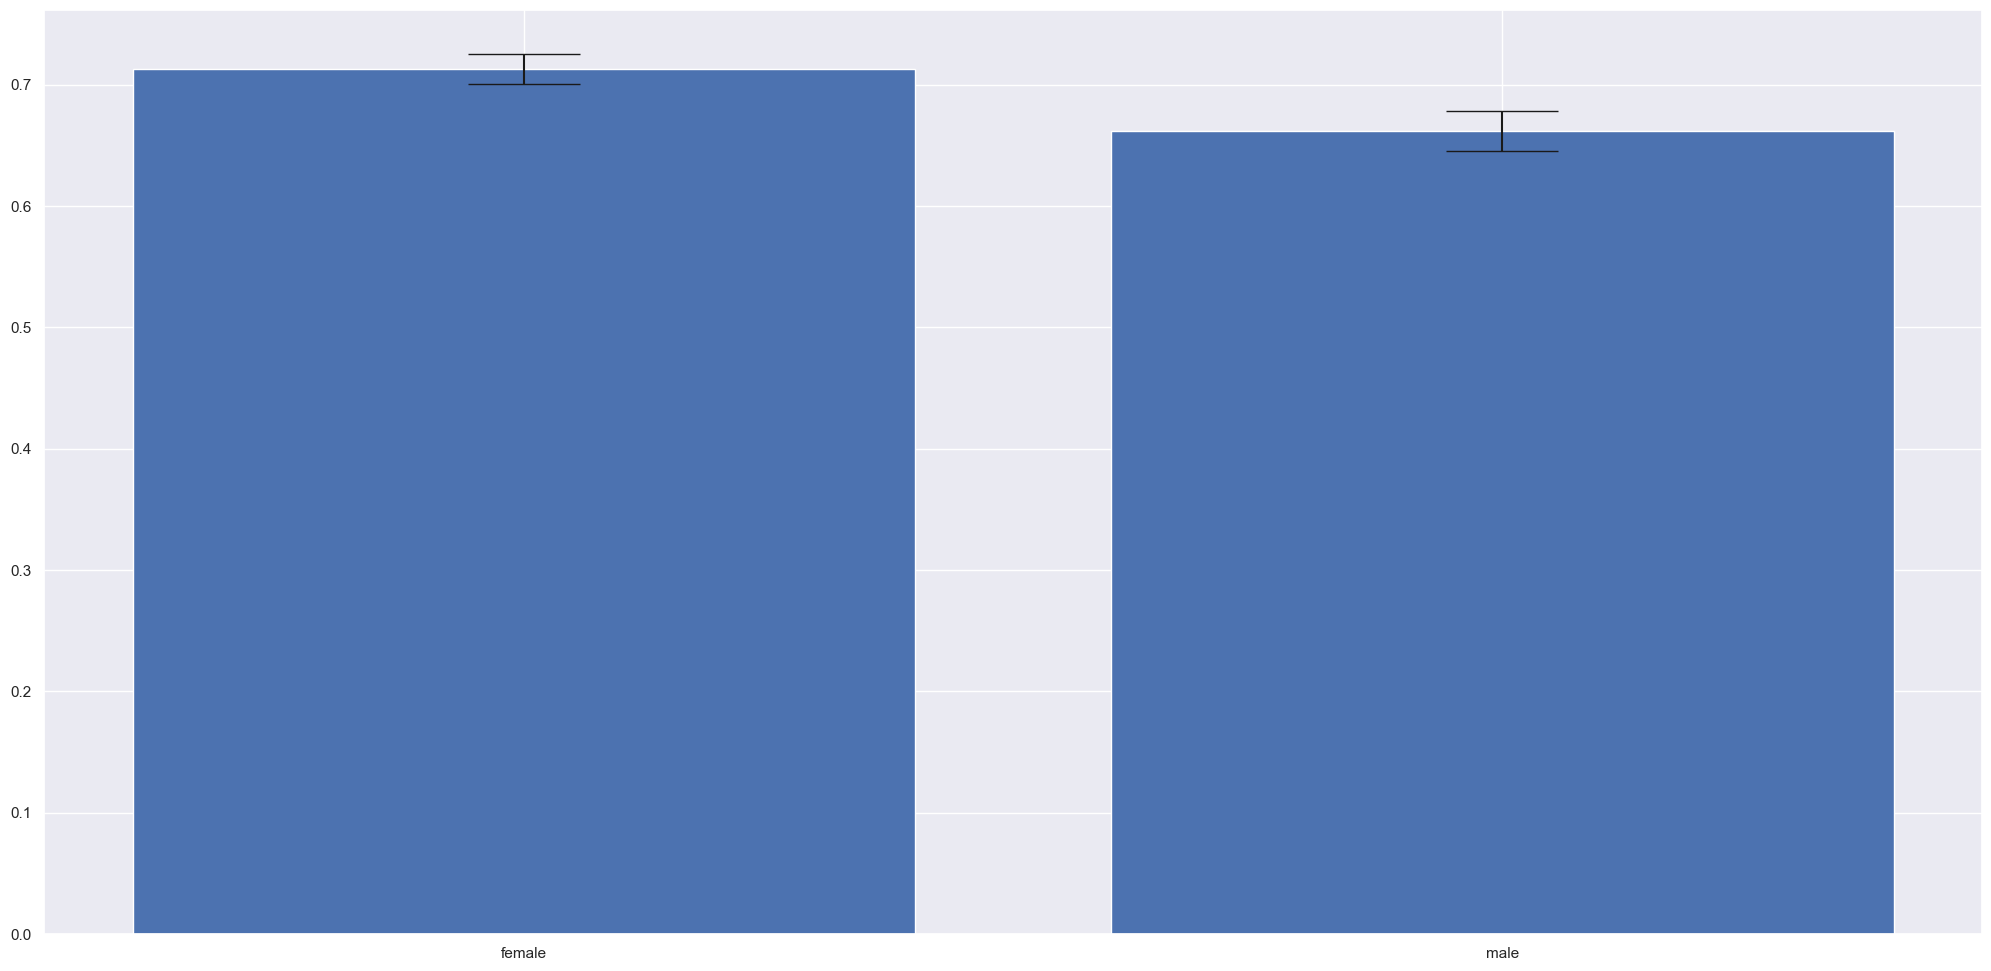

In [37]:
aux_60 = df4.query('age > 60')

summ_aux['gender'] = aux_60['gender']
summary = summ_aux[['gender', 'cardio_disease']].groupby('gender').agg({'gender': 'count', 'cardio_disease': ['sum', 'mean']})
intervals = sp.proportion_confint(summary[('cardio_disease', 'sum')], summary[('gender', 'count')], method='wilson')

summary['lo_conf'] = intervals[0]
summary['hi_conf'] = intervals[1]

summary['lo_int'] = summary[('cardio_disease', 'mean')] - summary['lo_conf']
summary['hi_int'] = summary['hi_conf'] - summary[('cardio_disease', 'mean')]

n_category = summary.shape[0]
plt.bar(x=summary.index, height=summary[('cardio_disease', 'mean')], yerr=summary[['lo_int', 'hi_int']].T.values, capsize=80/n_category)

**H9:** Of the people with heart disease, 65% have high blood pressure

TRUE: 64% of people with heart disease have a high blood pressure level.

Text(0.5, 1.0, 'People with heart disease')

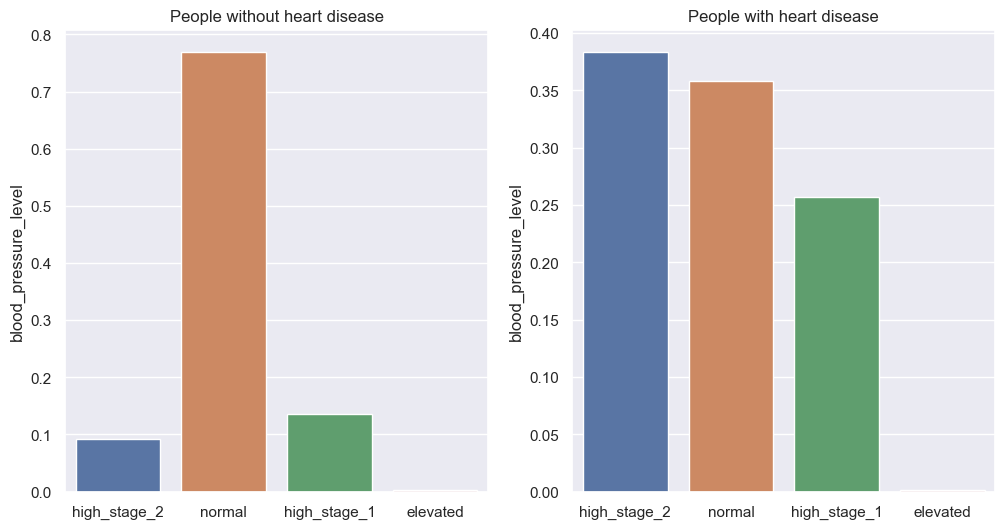

In [38]:
plot_card = df_disease['blood_pressure_level'].value_counts(normalize=True).to_frame()
plot_no_card = df_no_disease['blood_pressure_level'].value_counts(normalize=True).to_frame()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=plot_no_card.index, y=plot_no_card.blood_pressure_level, order=plot_card.index)
plt.title('People without heart disease')
plt.subplot(1, 2, 2)
sns.barplot(x=plot_card.index, y=plot_card.blood_pressure_level)
plt.title('People with heart disease')

**H10:** 80% of people that smoke, drink, and have high cholesterol levels, show heart problems.

FALSE: 65% of people with these characterics have a heart disease.

OBS: We have only a few instances (0.736 %) with these characterics in the dataset.

<AxesSubplot:ylabel='cardio_disease'>

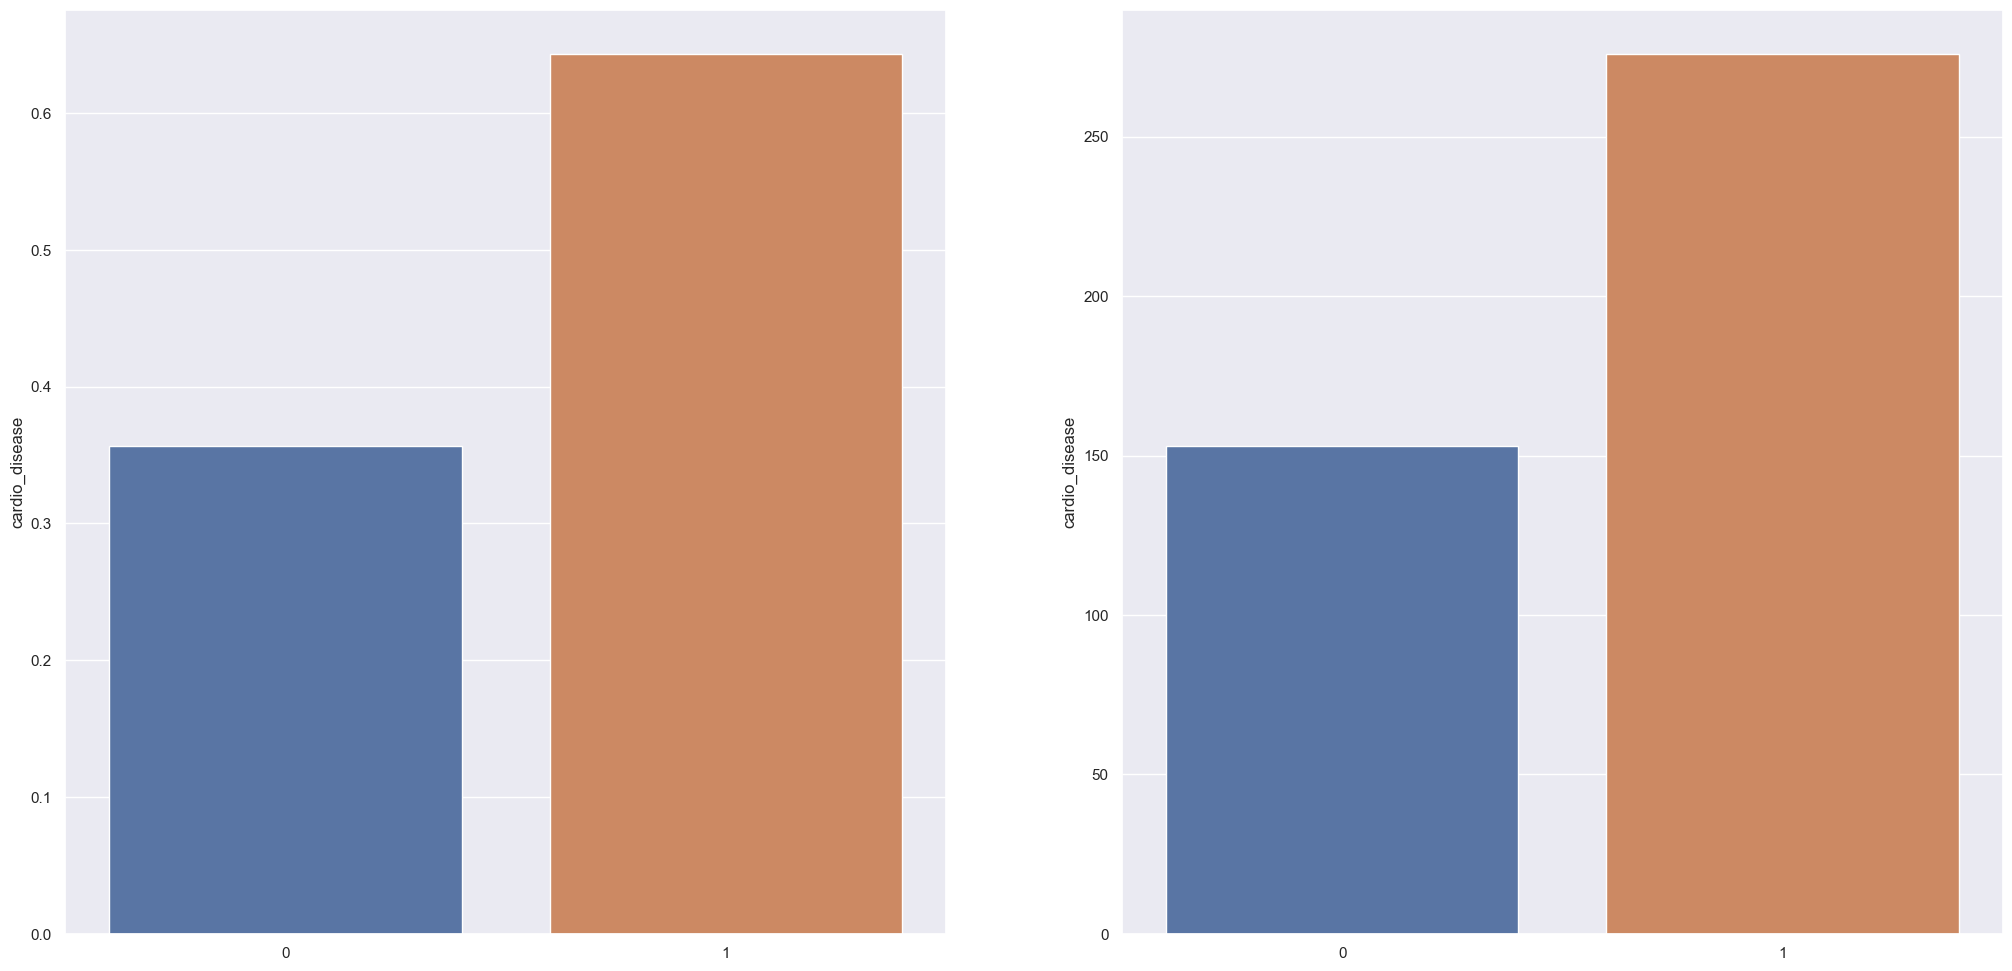

In [39]:
df_plot = df4.query("smoke==1 & alcohol_intake==1 & cholesterol in ('above_normal', 'well_above_normal')")['cardio_disease'].value_counts(normalize=True).to_frame()

df_plot_count = df4.query("smoke==1 & alcohol_intake==1 & cholesterol in ('above_normal', 'well_above_normal')")['cardio_disease'].value_counts().to_frame()

plt.subplot(1, 2, 1)
sns.barplot(x=df_plot.index, y=df_plot.cardio_disease)

plt.subplot(1, 2, 2)
sns.barplot(x=df_plot_count.index, y=df_plot_count.cardio_disease)

**H11:** People who consume alcohol and smoke have 50% more chance of heart disease than those who neither smoke nor drink.

FALSE: The proportion is higher for people that drink and don't smoke.

<AxesSubplot:xlabel='alcohol_intake', ylabel='cardio_disease'>

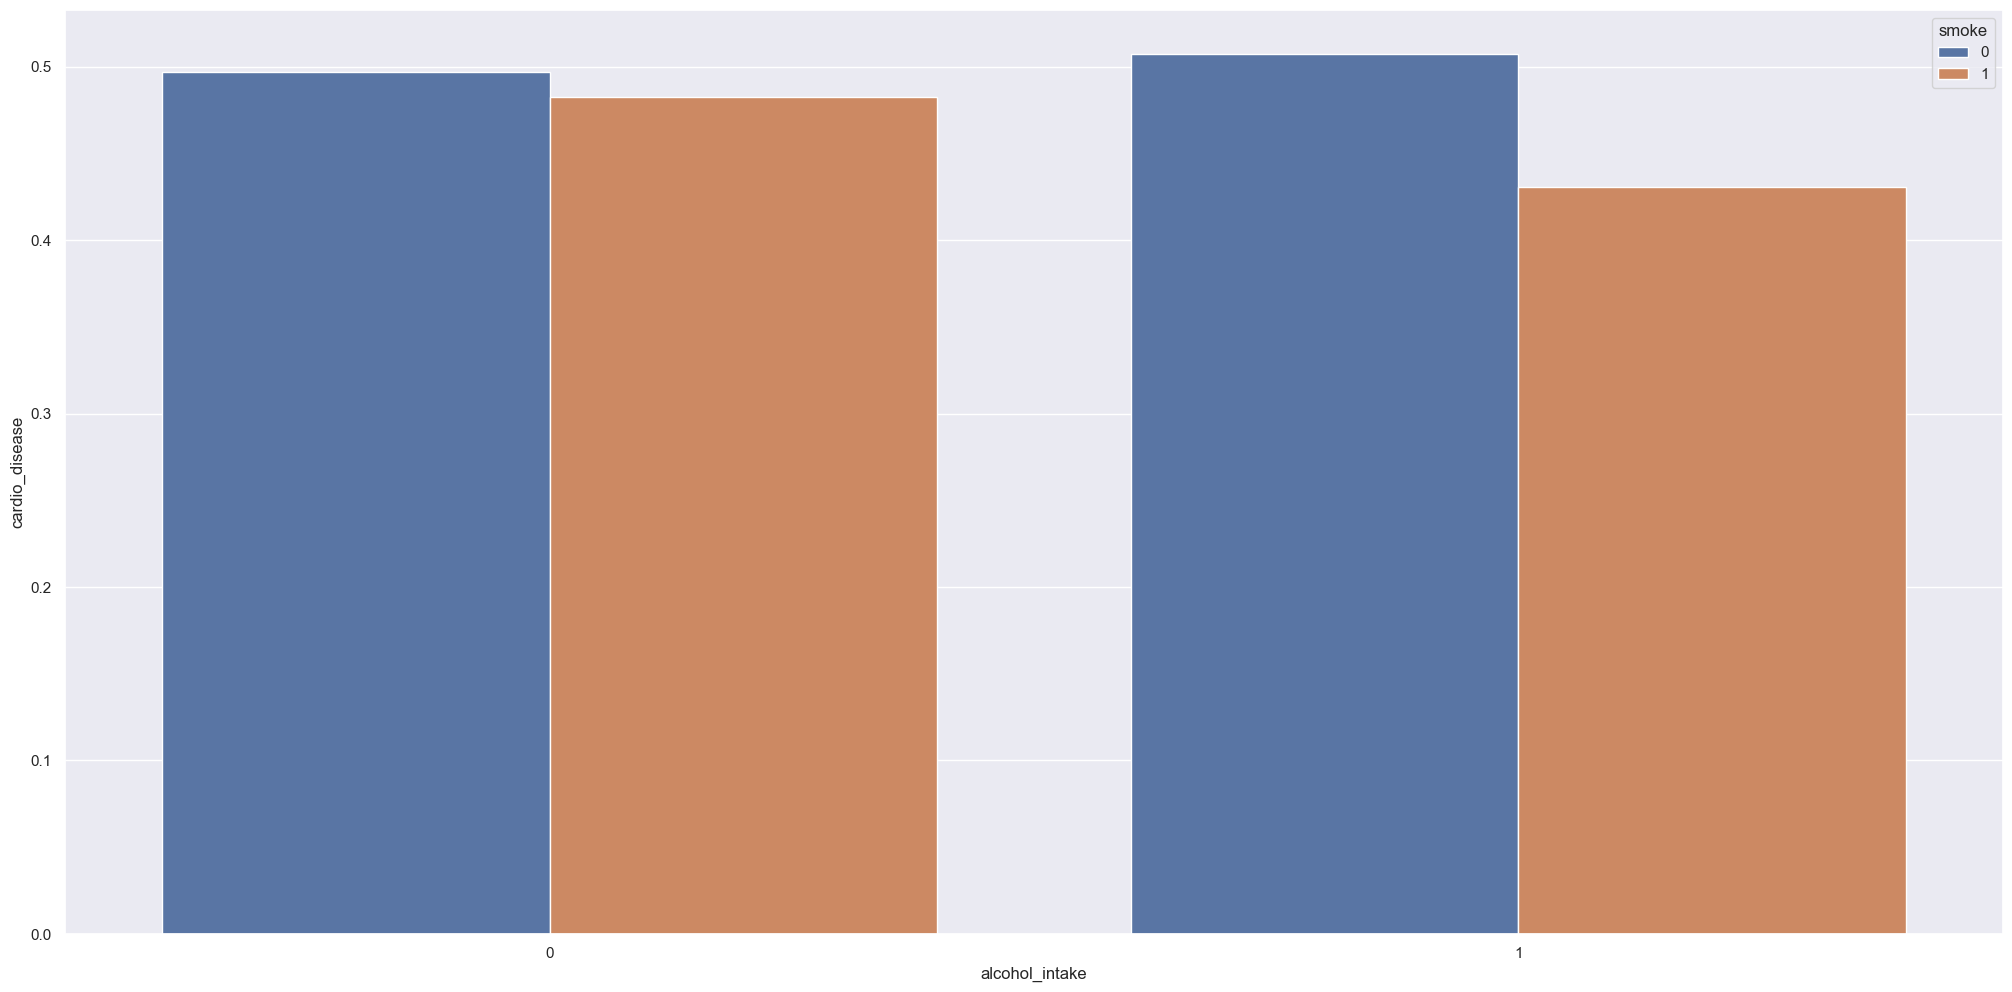

In [40]:
plot_df = df4[['alcohol_intake', 'smoke','cardio_disease']].groupby(['alcohol_intake', 'smoke']).mean().reset_index()
sns.barplot(x='alcohol_intake', y='cardio_disease', hue='smoke', data=plot_df)

## 5.3. Multivariate Analysis

### 5.3.1. Numerical Variables

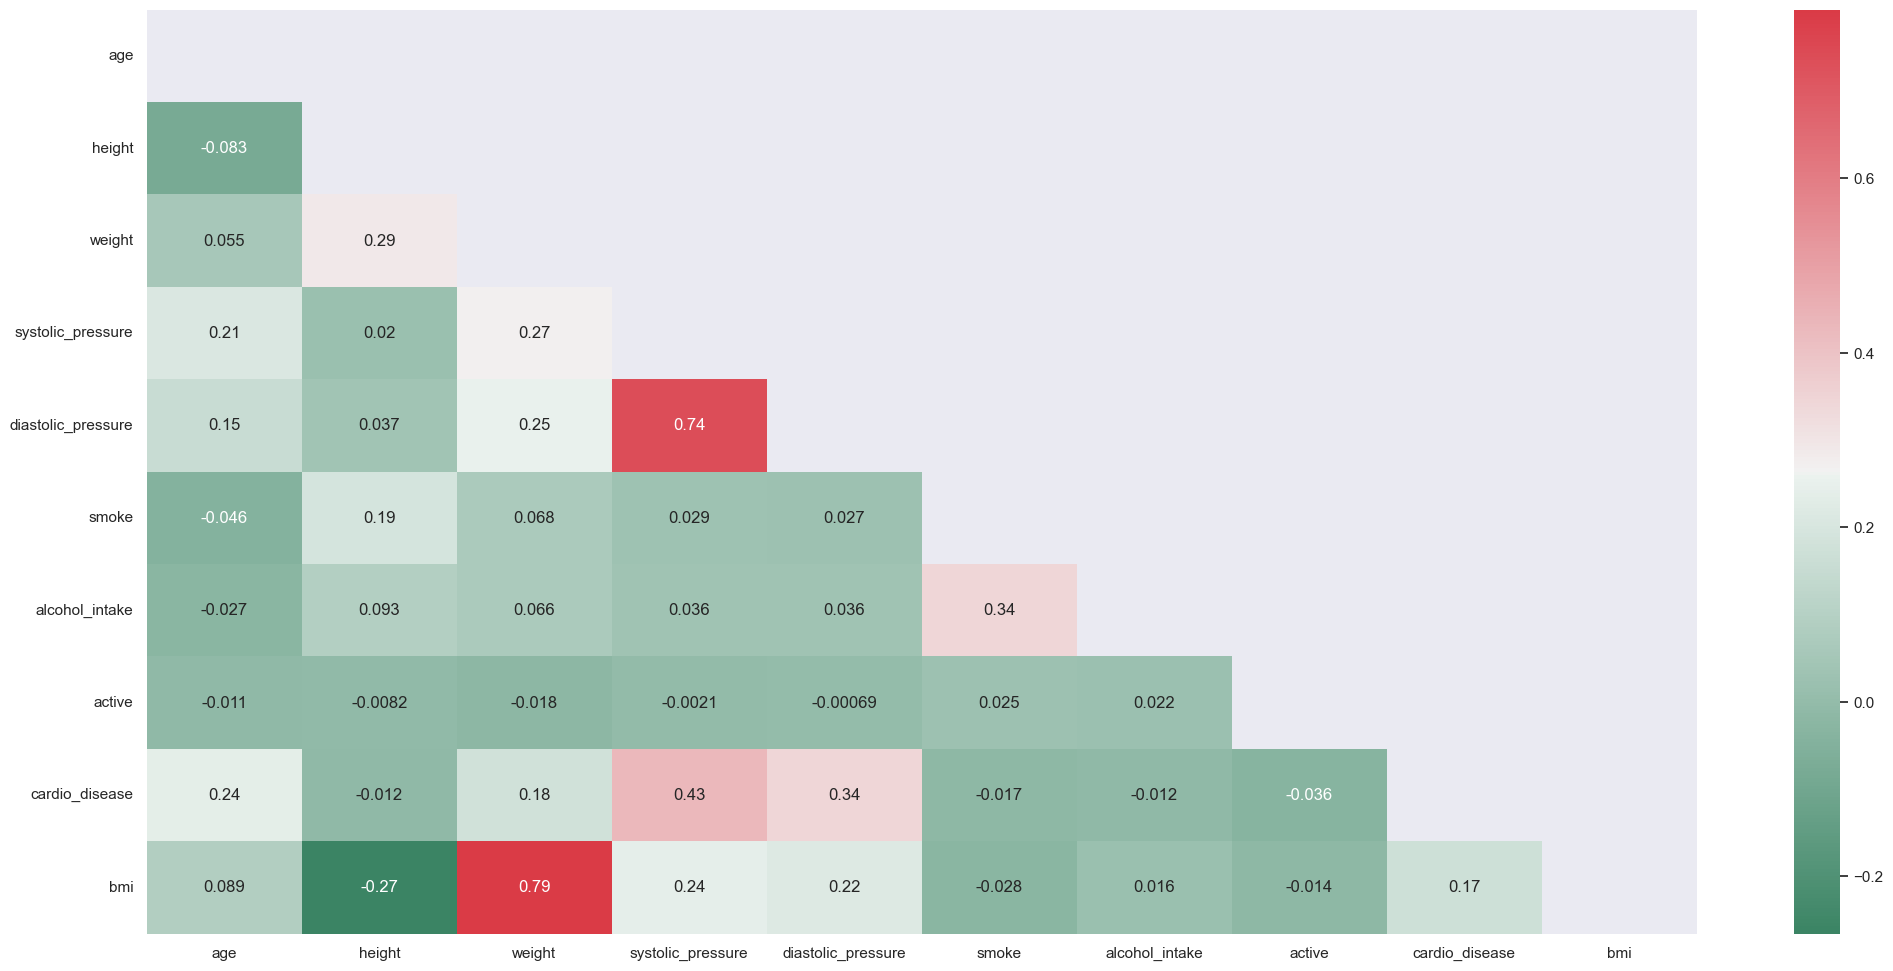

In [41]:
corr = df4.drop('id', axis=1).corr(method='pearson', numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(150, 10, as_cmap=True)

sns.heatmap(corr, annot=True, cmap=cmap, mask=mask);

### 5.3.1. Numerical Variables - Point Biserial

We can use point biserial correlation coefficient to measure the relationship between a binary variable and a continous variable.

In [42]:
binary_vals = ['smoke', 'alcohol_intake', 'active', 'cardio_disease']
num_variables = ['age', 'height', 'weight',	'systolic_pressure', 'diastolic_pressure', 'bmi']

dic = {}
lis = []


for bin_col in binary_vals:
    for num_col in num_variables:
        cor = ss.pointbiserialr(df4[bin_col], df4[num_col])[0]
        lis.append(cor)

    lis_ = lis.copy()
    dic[bin_col] = lis_
    lis.clear()


pb_cor_df = pd.DataFrame(dic, index=num_variables).T

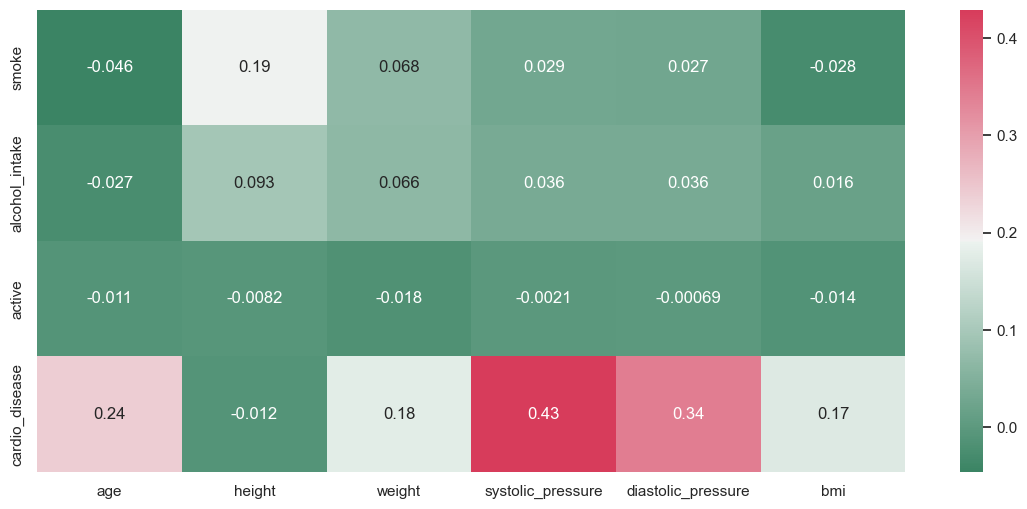

In [43]:
cmap = sns.diverging_palette(150, 5, as_cmap=True)

plt.subplots(figsize=(14, 6))
sns.heatmap(pb_cor_df, annot=True, cmap=cmap)
plt.show()

In [44]:
aux_1 = df4.select_dtypes(exclude=['float64']).drop(['height', 'systolic_pressure', 'diastolic_pressure', 'id', 'age'], axis=1)

def corr_cat(aux_1, cat_1, cat2):
    obs = pd.crosstab(index=aux_1[cat_1], columns=aux_1[cat2]).values
    return ss.contingency.association(observed=obs, method='cramer')

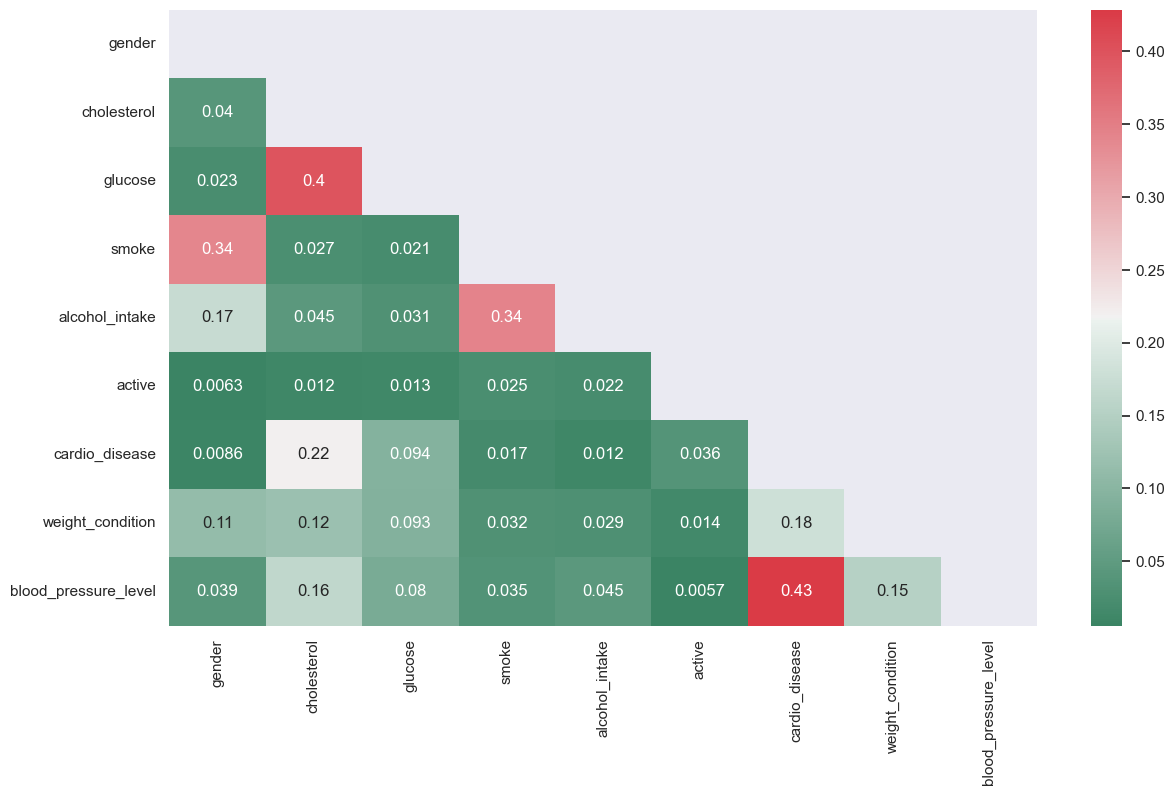

In [45]:
dic = {}
lis = []
corr_ = pd.DataFrame()

for i in aux_1.columns.to_list():
    for j in aux_1.columns.to_list():
        corr = corr_cat(aux_1, i, j)
        lis.append(corr)

    lista = lis.copy()
    dic[i] = lista
    lis.clear()


corr_ = pd.DataFrame(dic)
corr_ = corr_.set_index(corr_.columns)

mask = np.triu(np.ones_like(corr_, dtype=bool))
cmap = sns.diverging_palette(150, 10, as_cmap=True)

plt.subplots(figsize=(14, 8))
sns.heatmap(corr_, annot=True, cmap=cmap, mask=mask)
plt.show()

## 5.3 Hypothesis Summary

Hyphotese|Conclusion|Relevance|
---------|----------|---------|
H1|False|High|
H2|True|Average|
H3|False|Average|
H4|False|Low|
H5|True|Low|
H6|False|Low|
H7|False|Low|
H8|True|Low|
H9|True|High|
H10|False|Low|
H11|False|Low|



# 6.0. Data Preparation

In [46]:
df5 = df4.copy()

At the beginning of the project, 15% of the data was separated to be the test set (new data for the final model evaluation).
Now, we split the data into train and validation sets. This is only necessary because, initially, multiple models will be compared without cross-validation, and then the three best models will be selected for the cross-validation phase.

For cross-validation we use the whole data.

In [47]:
X = df5.drop('cardio_disease', axis=1)
y = df5['cardio_disease'].copy()

x_train, x_val, y_train, y_val = mselec.train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

X_train = x_train.drop(['id'], axis=1)
X_val = x_val.drop(['id'], axis=1)
#X_calib = x_calib.drop(['id'], axis=1)

## 6.1. Preparation Methods

We can use the normalization method for Weight and Height since these features have a normal distribution.

We can use the max-scaler method for age, systolic pressure, and diastolic pressure attributes (these attributes don't follow a normal distribution).

Since we have outliers, We can use the Robust Scaler for the BMI.

For this cycle we use onehot encodin for weight condition and ordinal encoder for blood pressure level (follows an order)

In [48]:
# Normalization
norm_cols = ['weight', 'height']

# Min-Max Scaler
min_max_cols = ['age', 'systolic_pressure', 'diastolic_pressure']

# Robust Scaler
rob_cols = ['bmi']

# Encoders

# OneHotEncoder
oneh_cols =  ['gender']

# Frequency Encoder
freq_cols = ['cholesterol', 'glucose', 'weight_condition', 'blood_pressure_level']


In [49]:
# Columns that won't be transformed for tree-based models
pass_cols_tree = X_train.select_dtypes(exclude=['object']).columns.to_list() 

# Columns that won't be transformed for linear models
pass_cols = ['smoke', 'alcohol_intake', 'active' ]

onehot = OneHotEncoder()
freq_enc = enc.CountFrequencyEncoder(encoding_method='frequency')
minmax_sc = MinMaxScaler()
robust_sc = RobustScaler()
norm_sc =  Normalizer()


one_transformer = Pipeline([('onehot_enc', onehot)])
freq_transformer = Pipeline([('frequency_enc', freq_enc)])
minmax_transformer = Pipeline([('minmax_sc', minmax_sc)] )
rob_transformer = Pipeline([('robust_sc', robust_sc)])
norm_transformer = Pipeline([('normilzer', norm_sc)])

# Linear Models
linear_preprocessor_all = ColumnTransformer(transformers=[
                                                          ('pass', 'passthrough', pass_cols),
                                                          ('minmax', minmax_transformer, min_max_cols),
                                                          ('robust', rob_transformer, rob_cols),
                                                          ('normalizer', norm_transformer, norm_cols),
                                                          ('frequency', freq_transformer, freq_cols),
                                                          ('onehot', one_transformer, oneh_cols)
                                                          ])


# Tree-based Models
forest_preprocessor_all = ColumnTransformer(transformers=[
                                                          ('pass', 'passthrough', pass_cols_tree),
                                                          ('frequency', freq_transformer, freq_cols),
                                                          ('onehot', one_transformer, oneh_cols)
                                                         ])

# 7.0. Feature Selection

## 7.1 Boruta for Feature Selection 

In [50]:
#X_boruta_train = forest_preprocessor_all.fit_transform(X_train)
#X_boruta_val = forest_preprocessor_all.transform(X_val)
##
#new_cols = forest_preprocessor_all.named_transformers_['onehot'].named_steps['onehot_enc'].get_feature_names(oneh_cols)
##
##columns = np.concatenate([pass_cols_tree, ord_cols, new_cols])
#columns = np.concatenate([pass_cols_tree, freq_cols, new_cols])
##columns = np.concatenate([pass_cols_tree, ord_cols, freq_cols])
##columns = np.concatenate([pass_cols_tree, freq_cols])
###
#X_boruta_train = pd.DataFrame(X_boruta_train, columns=columns)
#X_boruta_val = pd.DataFrame(X_boruta_val, columns=columns)

In [51]:
#rf = RandomForestClassifier(n_jobs=-1, random_state=42)
#xgb = xgboost.XGBClassifier(n_jobs=-1, random_state=42)
#boruta_ = boruta.BorutaPy(rf, n_estimators='auto', verbose=2, random_state=42).fit(X_boruta_train.values, y_train.ravel())
#boruta_xgb = boruta.BorutaPy(xgb, n_estimators='auto', verbose=2, random_state=42).fit(X_boruta_train.values, y_train.ravel())

In [52]:
#X_boruta_train.iloc[:, boruta_.support_.tolist()].columns
#X_boruta_train.iloc[:, boruta_xgb.support_.tolist()].columns

## 7.2 Manual Selection 

Using only the columns selected by boruta dropped the performance, so now I'll add other features.

In [53]:
cols_selected = ['age', 'systolic_pressure', 'diastolic_pressure', 'smoke',
       'alcohol_intake', 'active', 'cholesterol', 'glucose',
       'blood_pressure_level']
cols_man_selected = np.concatenate([cols_selected, ['bmi']])

# 8.0. Models

## 8.1. Without Scaling

In [54]:
warnings.filterwarnings('ignore')

In [55]:
seed = 42
classifiers = {'LogisticRegression': LogisticRegressionCV(max_iter=200, random_state=seed),
               'KNN': KNeighborsClassifier(n_neighbors=5, n_jobs=-1, weights='uniform'),
               'KNN_dist': KNeighborsClassifier(n_neighbors=5, n_jobs=-1, weights='distance'),
               'RandomForest': RandomForestClassifier(random_state=seed),
               'ExtraTrees': ExtraTreesClassifier(random_state=seed),
               'Ada Boost':AdaBoostClassifier(random_state=seed),
               'DecisionTree': DecisionTreeClassifier(random_state=seed),
               'XGB': xgboost.XGBClassifier(random_state=seed),
               'CatBoost': catboost.CatBoostClassifier(verbose=0, random_seed=seed),
               'GaussianNB': GaussianNB(),
               'LightGBM': LGBMClassifier(random_state=seed),
               'Dummy': DummyClassifier(random_state=seed)
                }
                
performs_no_scale_pipe = pd.DataFrame()

for clf_name, clf in classifiers.items():

    model = Pipeline(steps=[('preprocess', forest_preprocessor_all), (clf_name, clf)])

    train_metrics_pipe = hf.classifier_metrics(clf=model, clf_name=clf_name, x_train=X_train, x_val=X_val, y_train=y_train, y_val=y_val)

    performs_no_scale_pipe = pd.concat([performs_no_scale_pipe, train_metrics_pipe], axis=0)

performs_no_scale_pipe

,accuracy,brier_loss,f1_score,precision,recall,roc_auc
LogisticRegression_val,0.723280,0.186888,0.702399,0.749852,0.660593,0.791755
KNN_val,0.682707,0.221956,0.673723,0.685145,0.662676,0.731733
KNN_dist_val,0.679190,0.232588,0.671353,0.680078,0.662849,0.722829
RandomForest_val,0.708441,0.199133,0.702025,0.709426,0.694777,0.767880
ExtraTrees_val,0.696603,0.214325,0.692835,0.693498,0.692174,0.745831
Ada Boost_val,0.726197,0.246926,0.700338,0.762937,0.647232,0.796410
DecisionTree_val,0.637588,0.358338,0.629808,0.636106,0.623634,0.638373
XGB_val,0.728941,0.182590,0.714131,0.745984,0.684886,0.797632
CatBoost_val,0.733145,0.179752,0.719906,0.748129,0.693736,0.804009
GaussianNB_val,0.716933,0.226979,0.699508,0.735965,0.666493,0.778746


In [104]:
df_to_image(performs_no_scale_pipe.reset_index().rename(columns={'index': 'classifier'}), head_color='royalblue', table_color='snow')

In [56]:
performs_no_scale_pipe.style.highlight_max(subset=['accuracy', 'f1_score', 'precision', 'recall', 'roc_auc'], color='orange', axis=0).highlight_min(subset=['brier_loss'], axis=0)

,accuracy,brier_loss,f1_score,precision,recall,roc_auc
LogisticRegression_val,0.723280,0.186888,0.702399,0.749852,0.660593,0.791755
KNN_val,0.682707,0.221956,0.673723,0.685145,0.662676,0.731733
KNN_dist_val,0.679190,0.232588,0.671353,0.680078,0.662849,0.722829
RandomForest_val,0.708441,0.199133,0.702025,0.709426,0.694777,0.767880
ExtraTrees_val,0.696603,0.214325,0.692835,0.693498,0.692174,0.745831
Ada Boost_val,0.726197,0.246926,0.700338,0.762937,0.647232,0.796410
DecisionTree_val,0.637588,0.358338,0.629808,0.636106,0.623634,0.638373
XGB_val,0.728941,0.182590,0.714131,0.745984,0.684886,0.797632
CatBoost_val,0.733145,0.179752,0.719906,0.748129,0.693736,0.804009
GaussianNB_val,0.716933,0.226979,0.699508,0.735965,0.666493,0.778746


In [57]:
new_cols = model.named_steps['preprocess'].named_transformers_['onehot'].named_steps['onehot_enc'].get_feature_names(oneh_cols)

dfi.export(performs_no_scale_pipe, 'images/performances/perfroms4_no_scaling_freqenc_gender_onehot_pipe.png')

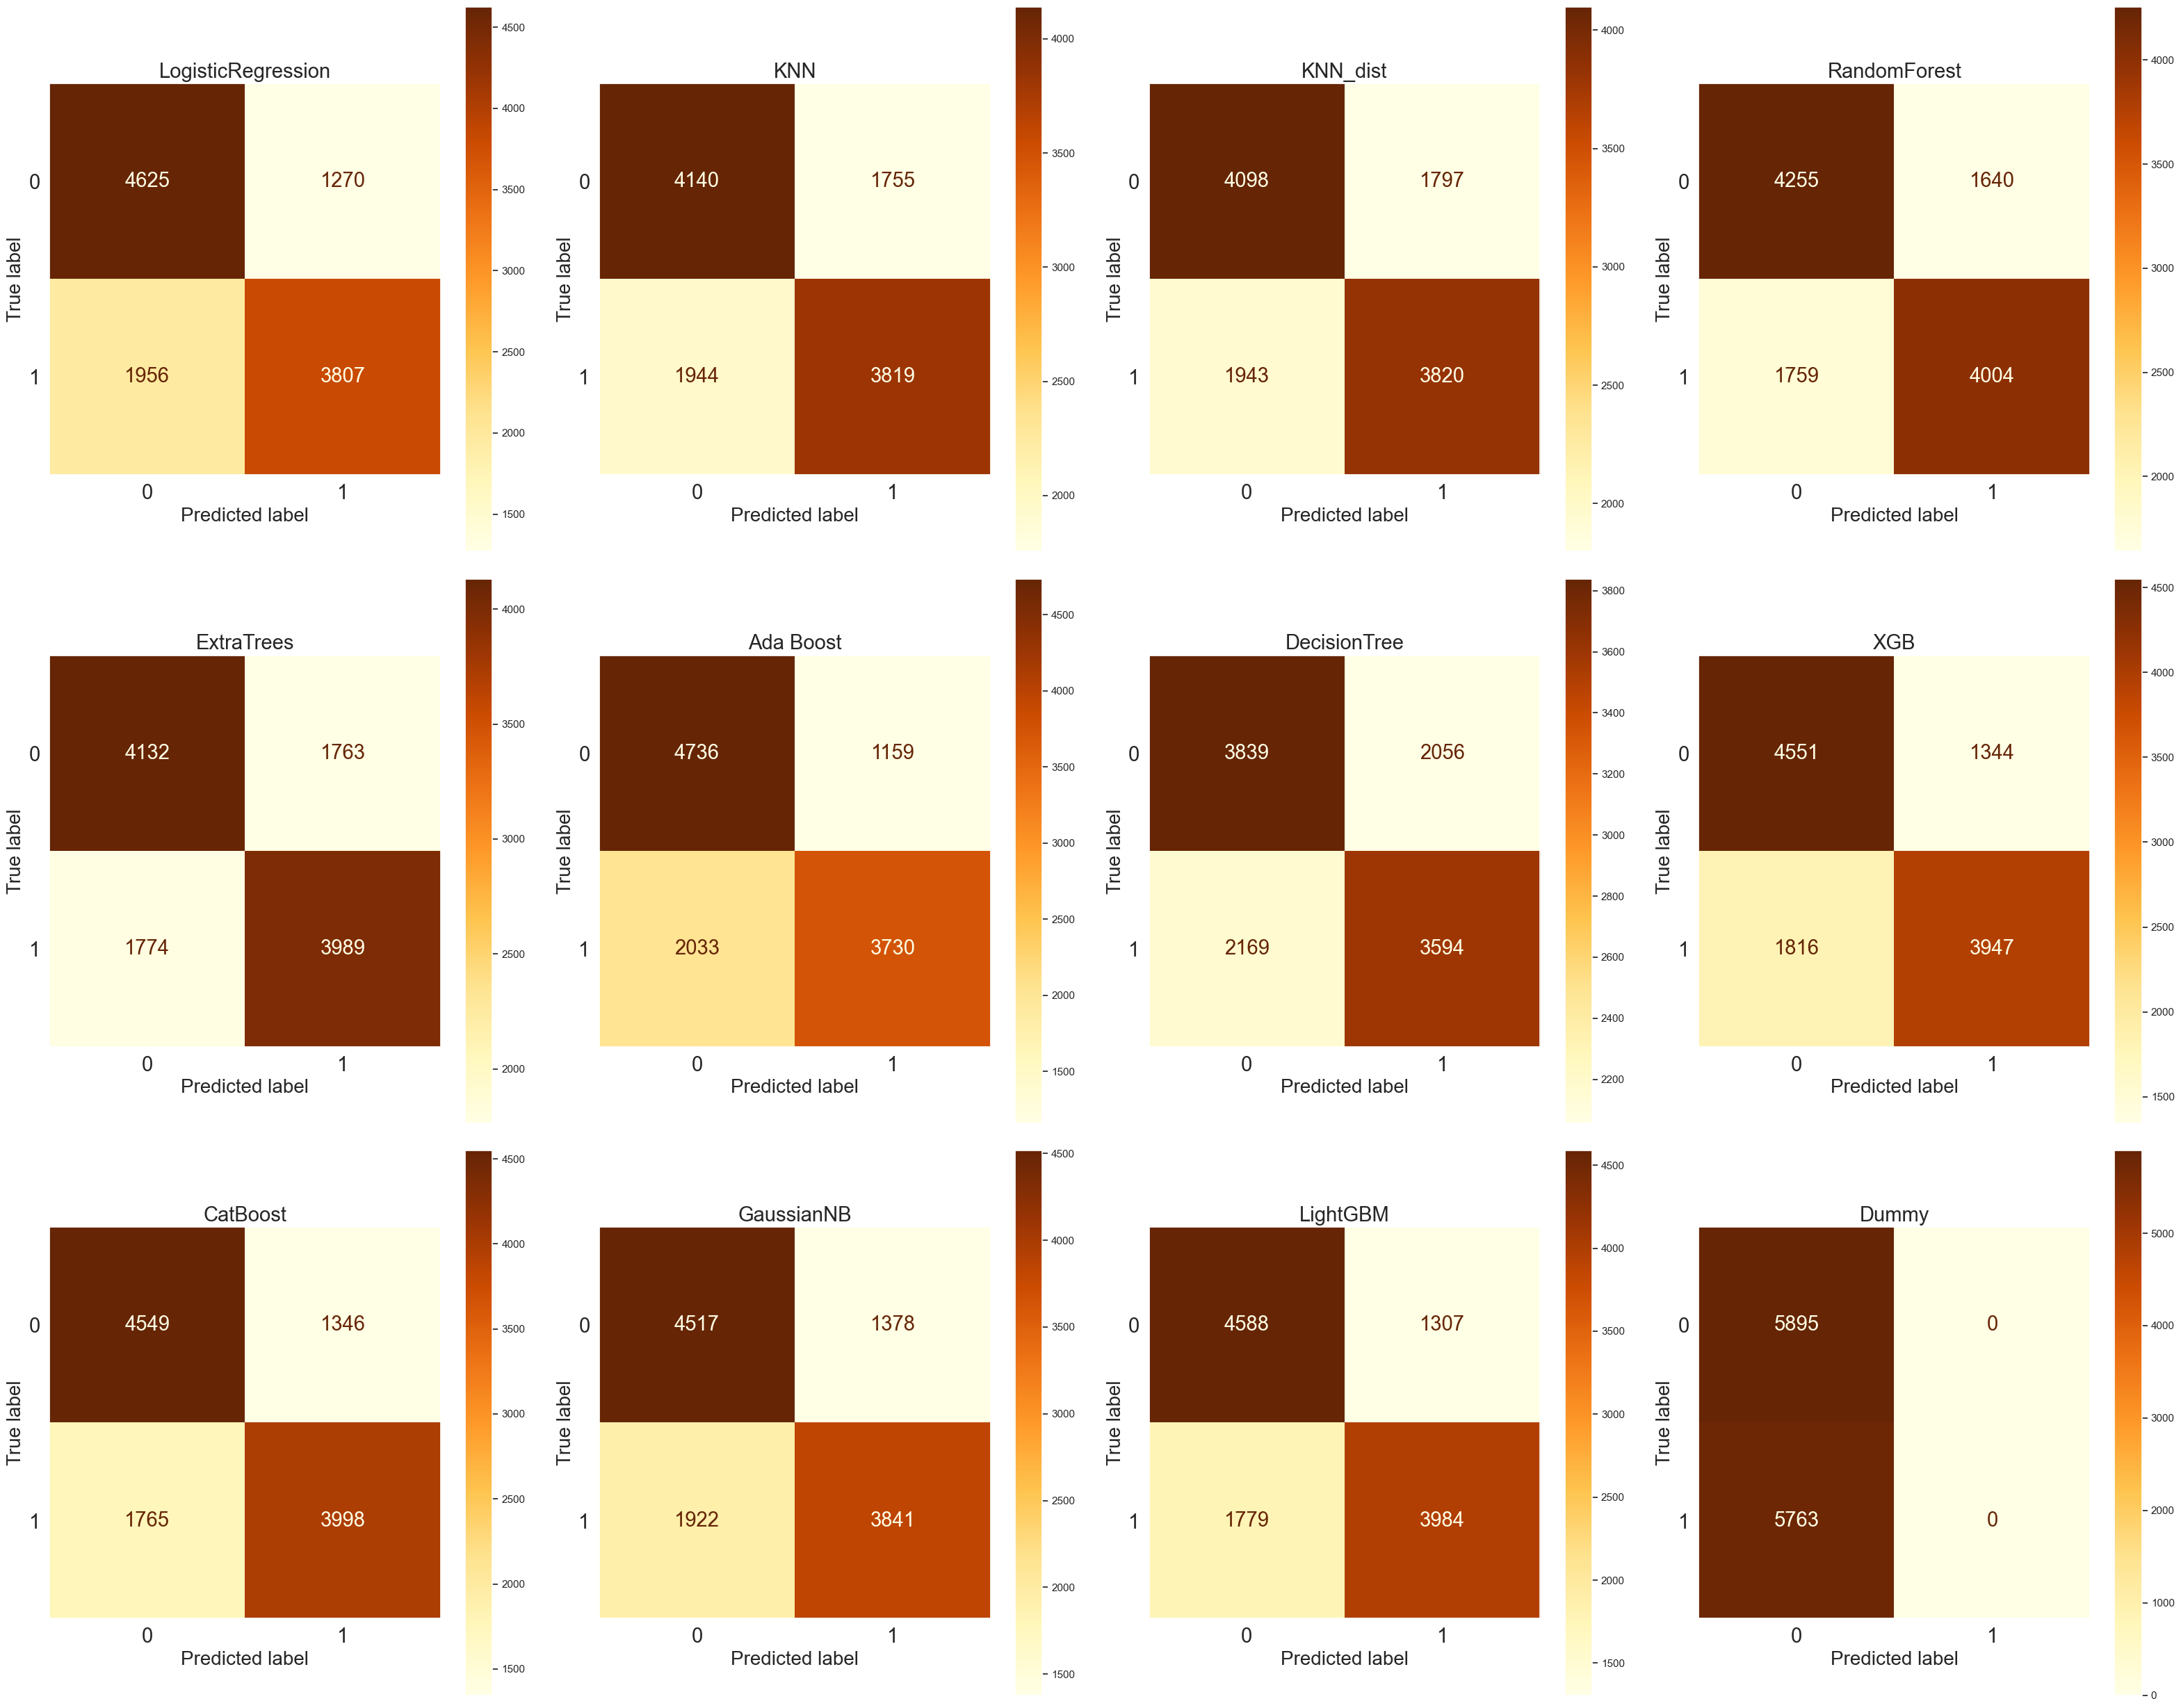

In [58]:
num_cols = 4
num_rows = 3
col = 0
row = 0

fig, axis = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(32, 25))
for clf_name, clf in classifiers.items():

    model_plot = Pipeline(steps=[('preprocess', forest_preprocessor_all), (clf_name, clf)])

    hf.classifier_confusion_matrix(clf=model_plot, clf_name=clf_name, x_train=X_train, x_val=X_val, y_train=y_train, y_val=y_val, axis=axis, col=col, row=row)

    col+=1
    if col == num_cols:
        row += 1
        col = 0

plt.tight_layout()
plt.show()

In [59]:
#h_df = performs_no_scale.style.highlight_max(subset=['accuracy', 'f1_score',  'precision', 'recall', 'roc_auc'],color='orange', axis=0).highlight_min(subset=['brier_loss'], axis=0)
#dfi.export(h_df, 'images/performances/perfroms_highlighted.png')

For the business, we are looking for the best precision. But, we also want to avoid predicting that the patient does not have a cardiac disease when, in fact, he has. Therefore, we are looking for a model with good precision and recall. 

A good measure we can focus on is the f1_score; this metric computes the harmonic average between precision and recall.

LightGBM, CatBoost, and XGBoost had the best f-scores. In the next section, we will give a better look at them. We note that Random forest had the best recall but very low precision; Ada Boost had the best precision score and one of the worst recalls.

## 8.1.1. All features Scaled (<span style='color:red'> This section was removed)</span>

Most models didn't improve, or the improvement was small from data scaling. Also, the three best models are tree-based algorithms and had worse performances with data scaling. And since data scaling is not necessary for these algorithms, this section was removed.

In [60]:
#seed = 42
#classifiers = {'LogisticRegression': LogisticRegressionCV(max_iter=200, random_state=seed),
#               'KNN': KNeighborsClassifier(n_neighbors=5, n_jobs=-1, weights='uniform'),
#               'KNN_dist': KNeighborsClassifier(n_neighbors=5, n_jobs=-1, weights='distance'),
#               'RandomForest': RandomForestClassifier( random_state=seed),
#               'ExtraTrees': ExtraTreesClassifier(random_state=seed),
#               'Ada Boost':AdaBoostClassifier(random_state=seed),
#               'DecisionTree': DecisionTreeClassifier(random_state=seed),
#               'XGB': xgboost.XGBClassifier(random_state=seed),
#               'CatBoost': catboost.CatBoostClassifier(verbose=0, random_seed=seed),
#               'GaussianNB': GaussianNB(),
#               'LightGBM': LGBMClassifier(random_state=seed),
#               'Dummy': DummyClassifier(random_state=seed)
#                }
#                
#performs_scaled = pd.DataFrame()
#
#for clf_name, clf in classifiers.items():
#
#    train_metrics = classifier_metrics(clf=clf, clf_name=clf_name, x_train=X_train_lin, #x_val=X_val_lin, y_train=y_train, y_val=y_val)
#
#    performs_scaled = pd.concat([performs_scaled, train_metrics], axis=0)
#
#performs_scaled

In [61]:
#num_cols = 4
#num_rows = 3
#col = 0
#row = 0
#fig, axis = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(32, 25))
#
#for clf_name, clf in classifiers.items():
#
#    classifier_confusion_matrix(clf=clf, clf_name=clf_name, x_train=X_train_lin, x_val=X_val_lin, #y_train=y_train, y_val=y_val, axis=axis, col=col, row=row)
#
#    col+=1
#    if col == num_cols:
#        row += 1
#        col = 0
#
#plt.tight_layout()
#plt.show()

## 8.2 Three Best Models Comparison

**Defining pipeline for the models**

In [62]:
lgb_pipe = Pipeline(steps=[('preprocess', forest_preprocessor_all), ('lgbmclassifier', classifiers['LightGBM'])])
xgb_pipe = Pipeline(steps=[('preprocess', forest_preprocessor_all), ('xgbclassifier', classifiers['XGB'])])
catb_pipe = Pipeline(steps=[('preprocess', forest_preprocessor_all), ('catbclassifier', classifiers['CatBoost'])])

### 8.2.1 LightGBMClassifier

In [63]:
lgb_pipe.fit(X_train, y_train)
yhat_lgb = lgb_pipe.predict(X_val)
y_prob_lgb = lgb_pipe.predict_proba(X_val)

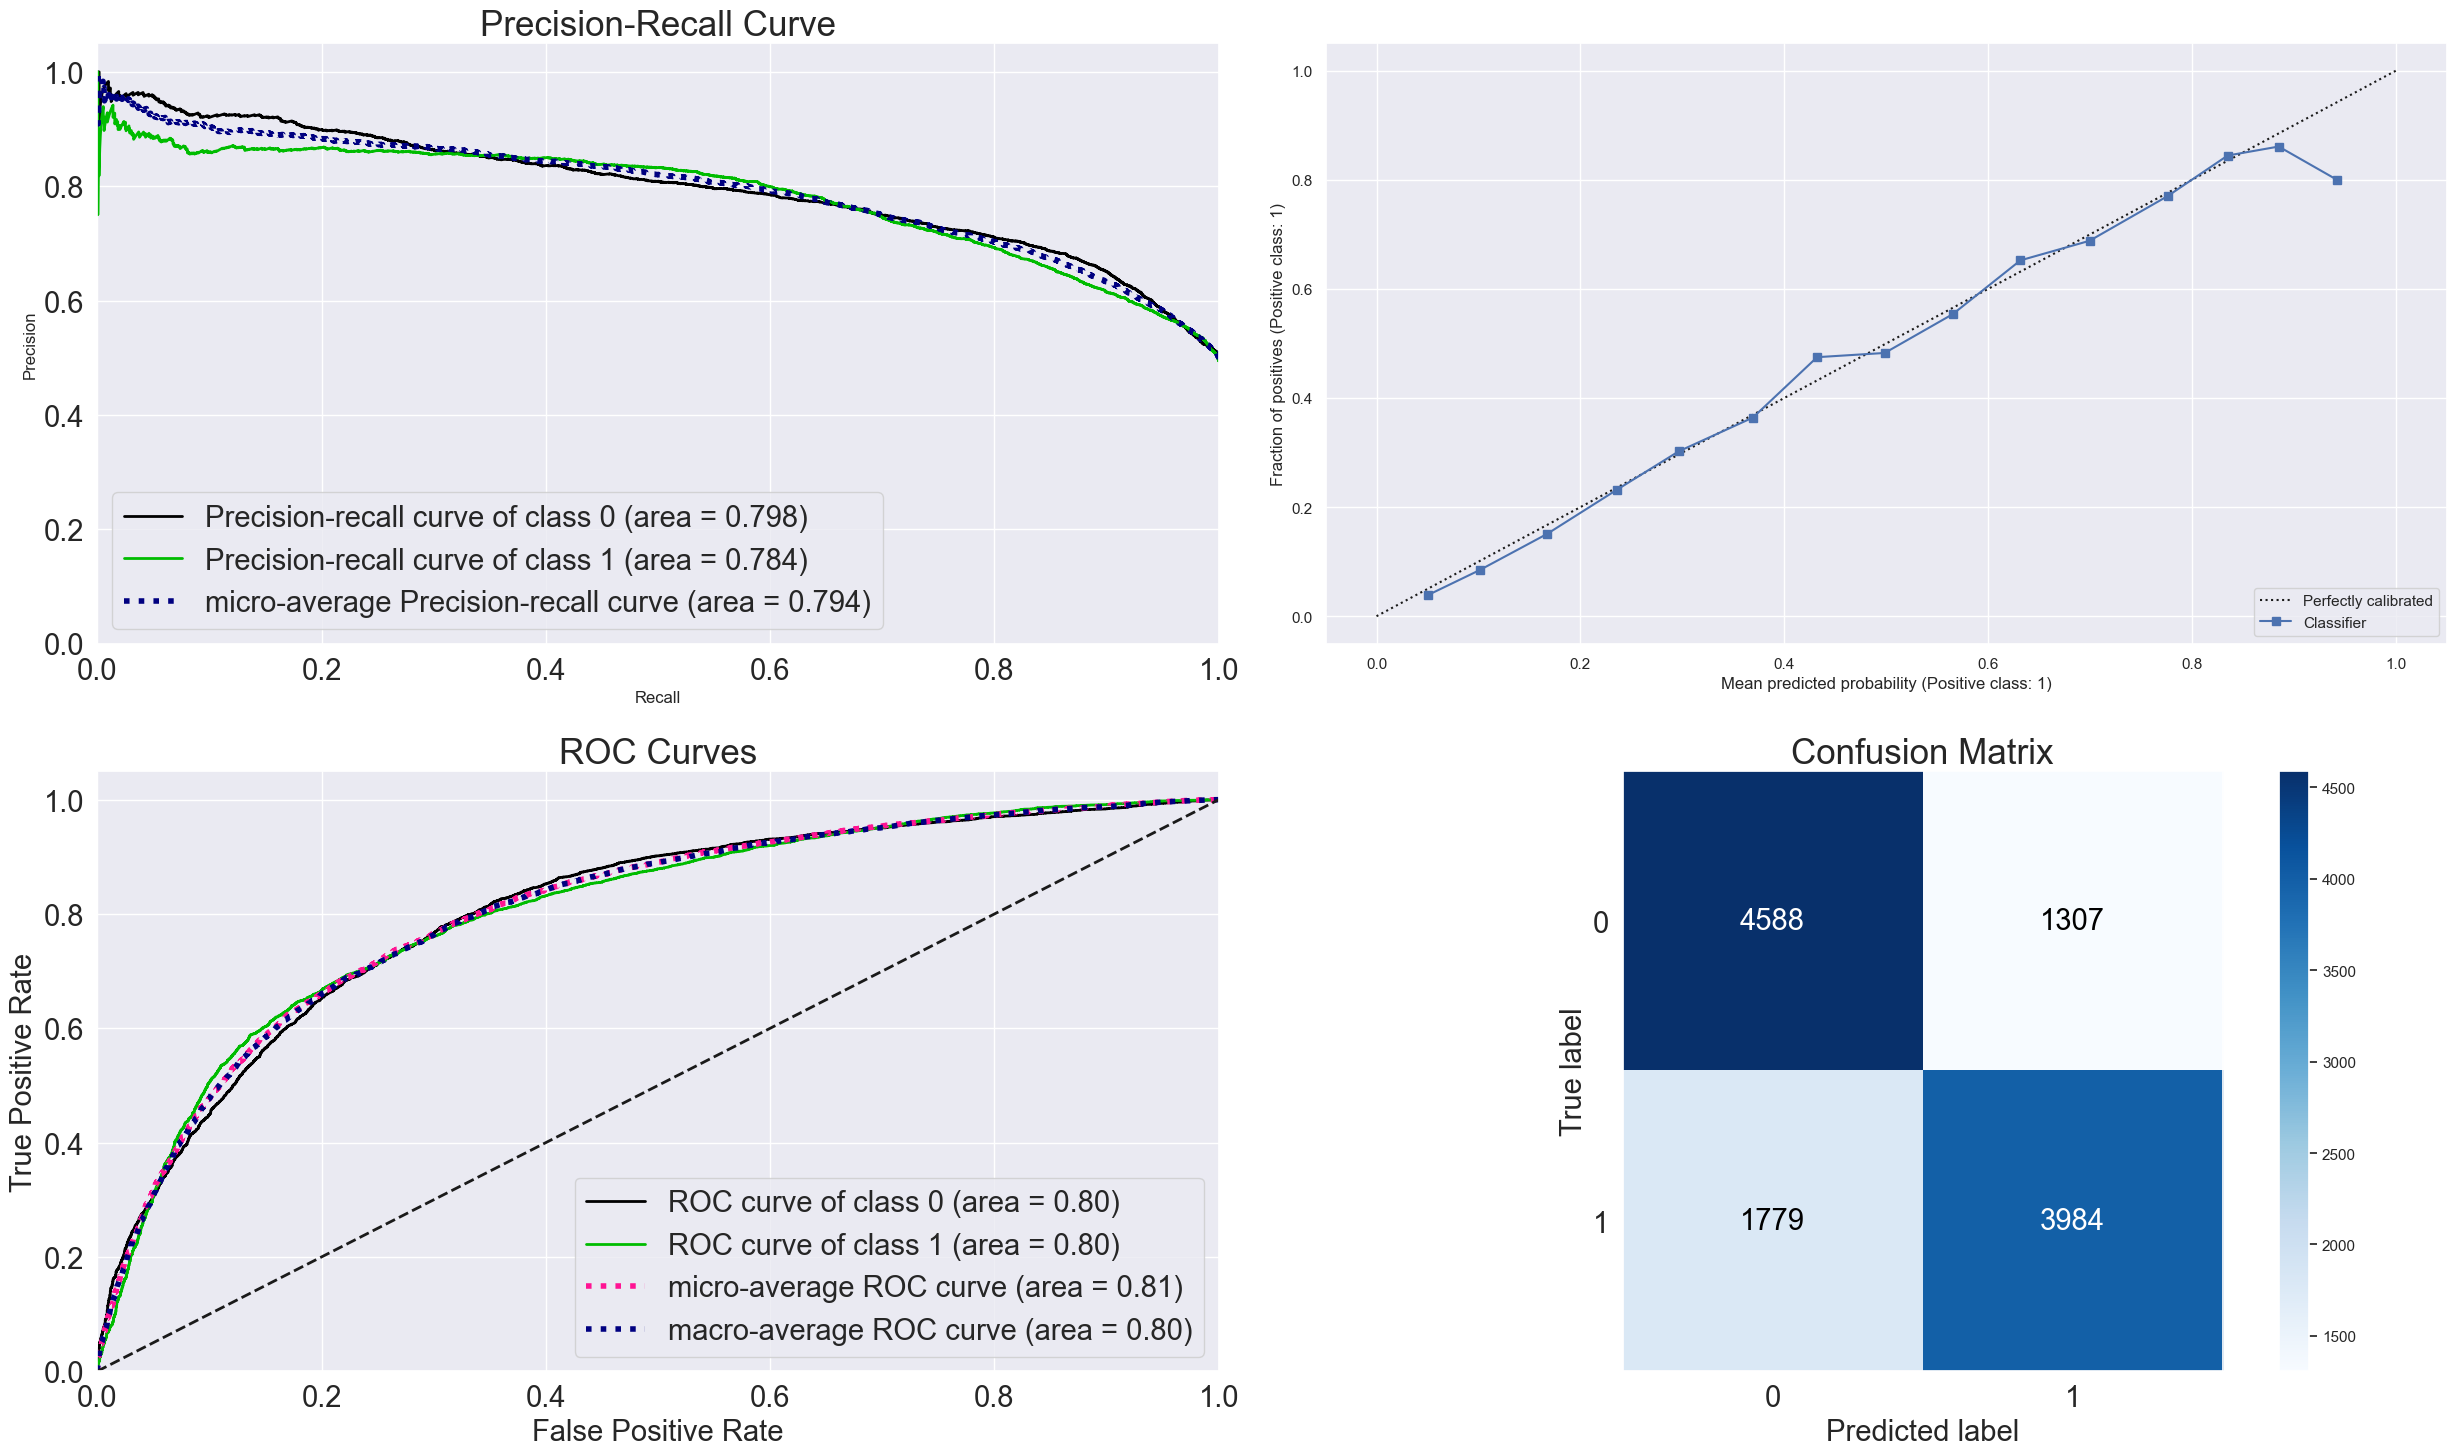

In [64]:
hf.classifier_metrics_plot(yhat_=yhat_lgb, y_prob=y_prob_lgb, y_true=y_val, bins=15)

### 8.2.1 XGBoostClassifier

In [65]:
xgb_pipe.fit(X_train, y_train)
yhat_xgb = xgb_pipe.predict(X_val)
y_prob_xgb = xgb_pipe.predict_proba(X_val)

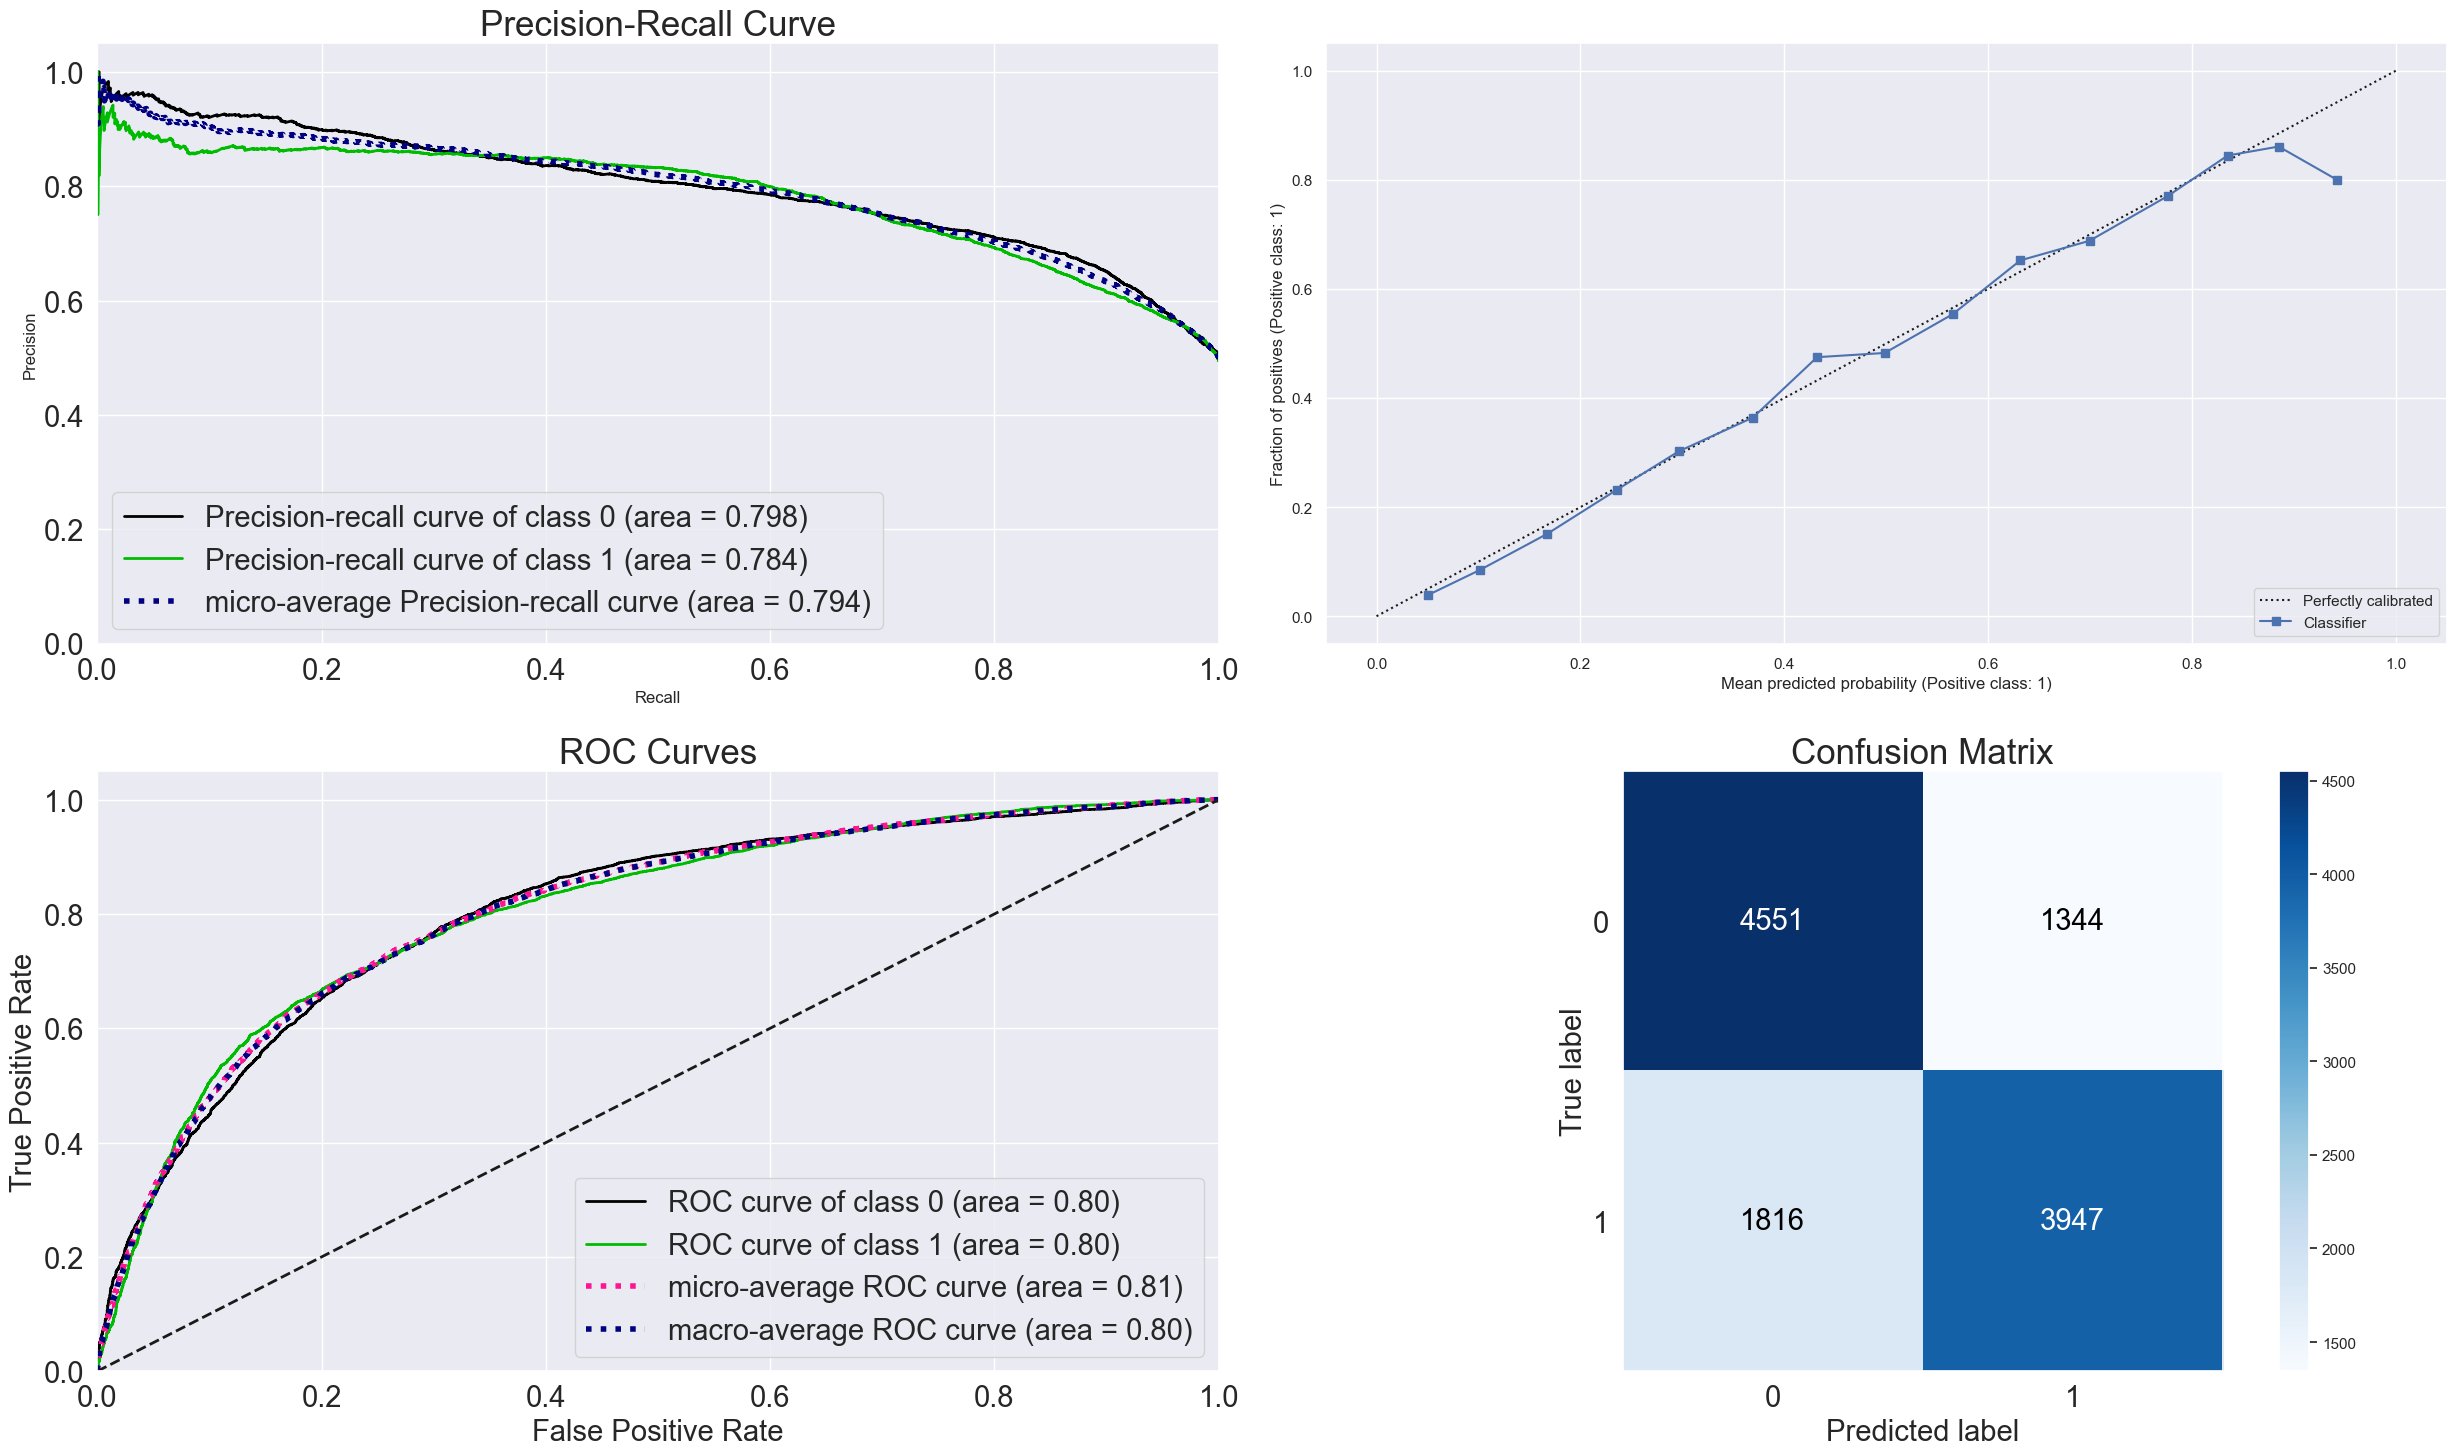

In [66]:
hf.classifier_metrics_plot(yhat_=yhat_xgb , y_prob=y_prob_lgb, y_true=y_val, bins=15)

### 8.2.1 CatBoostClassifier

In [67]:
catb_pipe.fit(X_train, y_train)
yhat_catb = catb_pipe.predict(X_val)
y_prob_catb = catb_pipe.predict_proba(X_val)

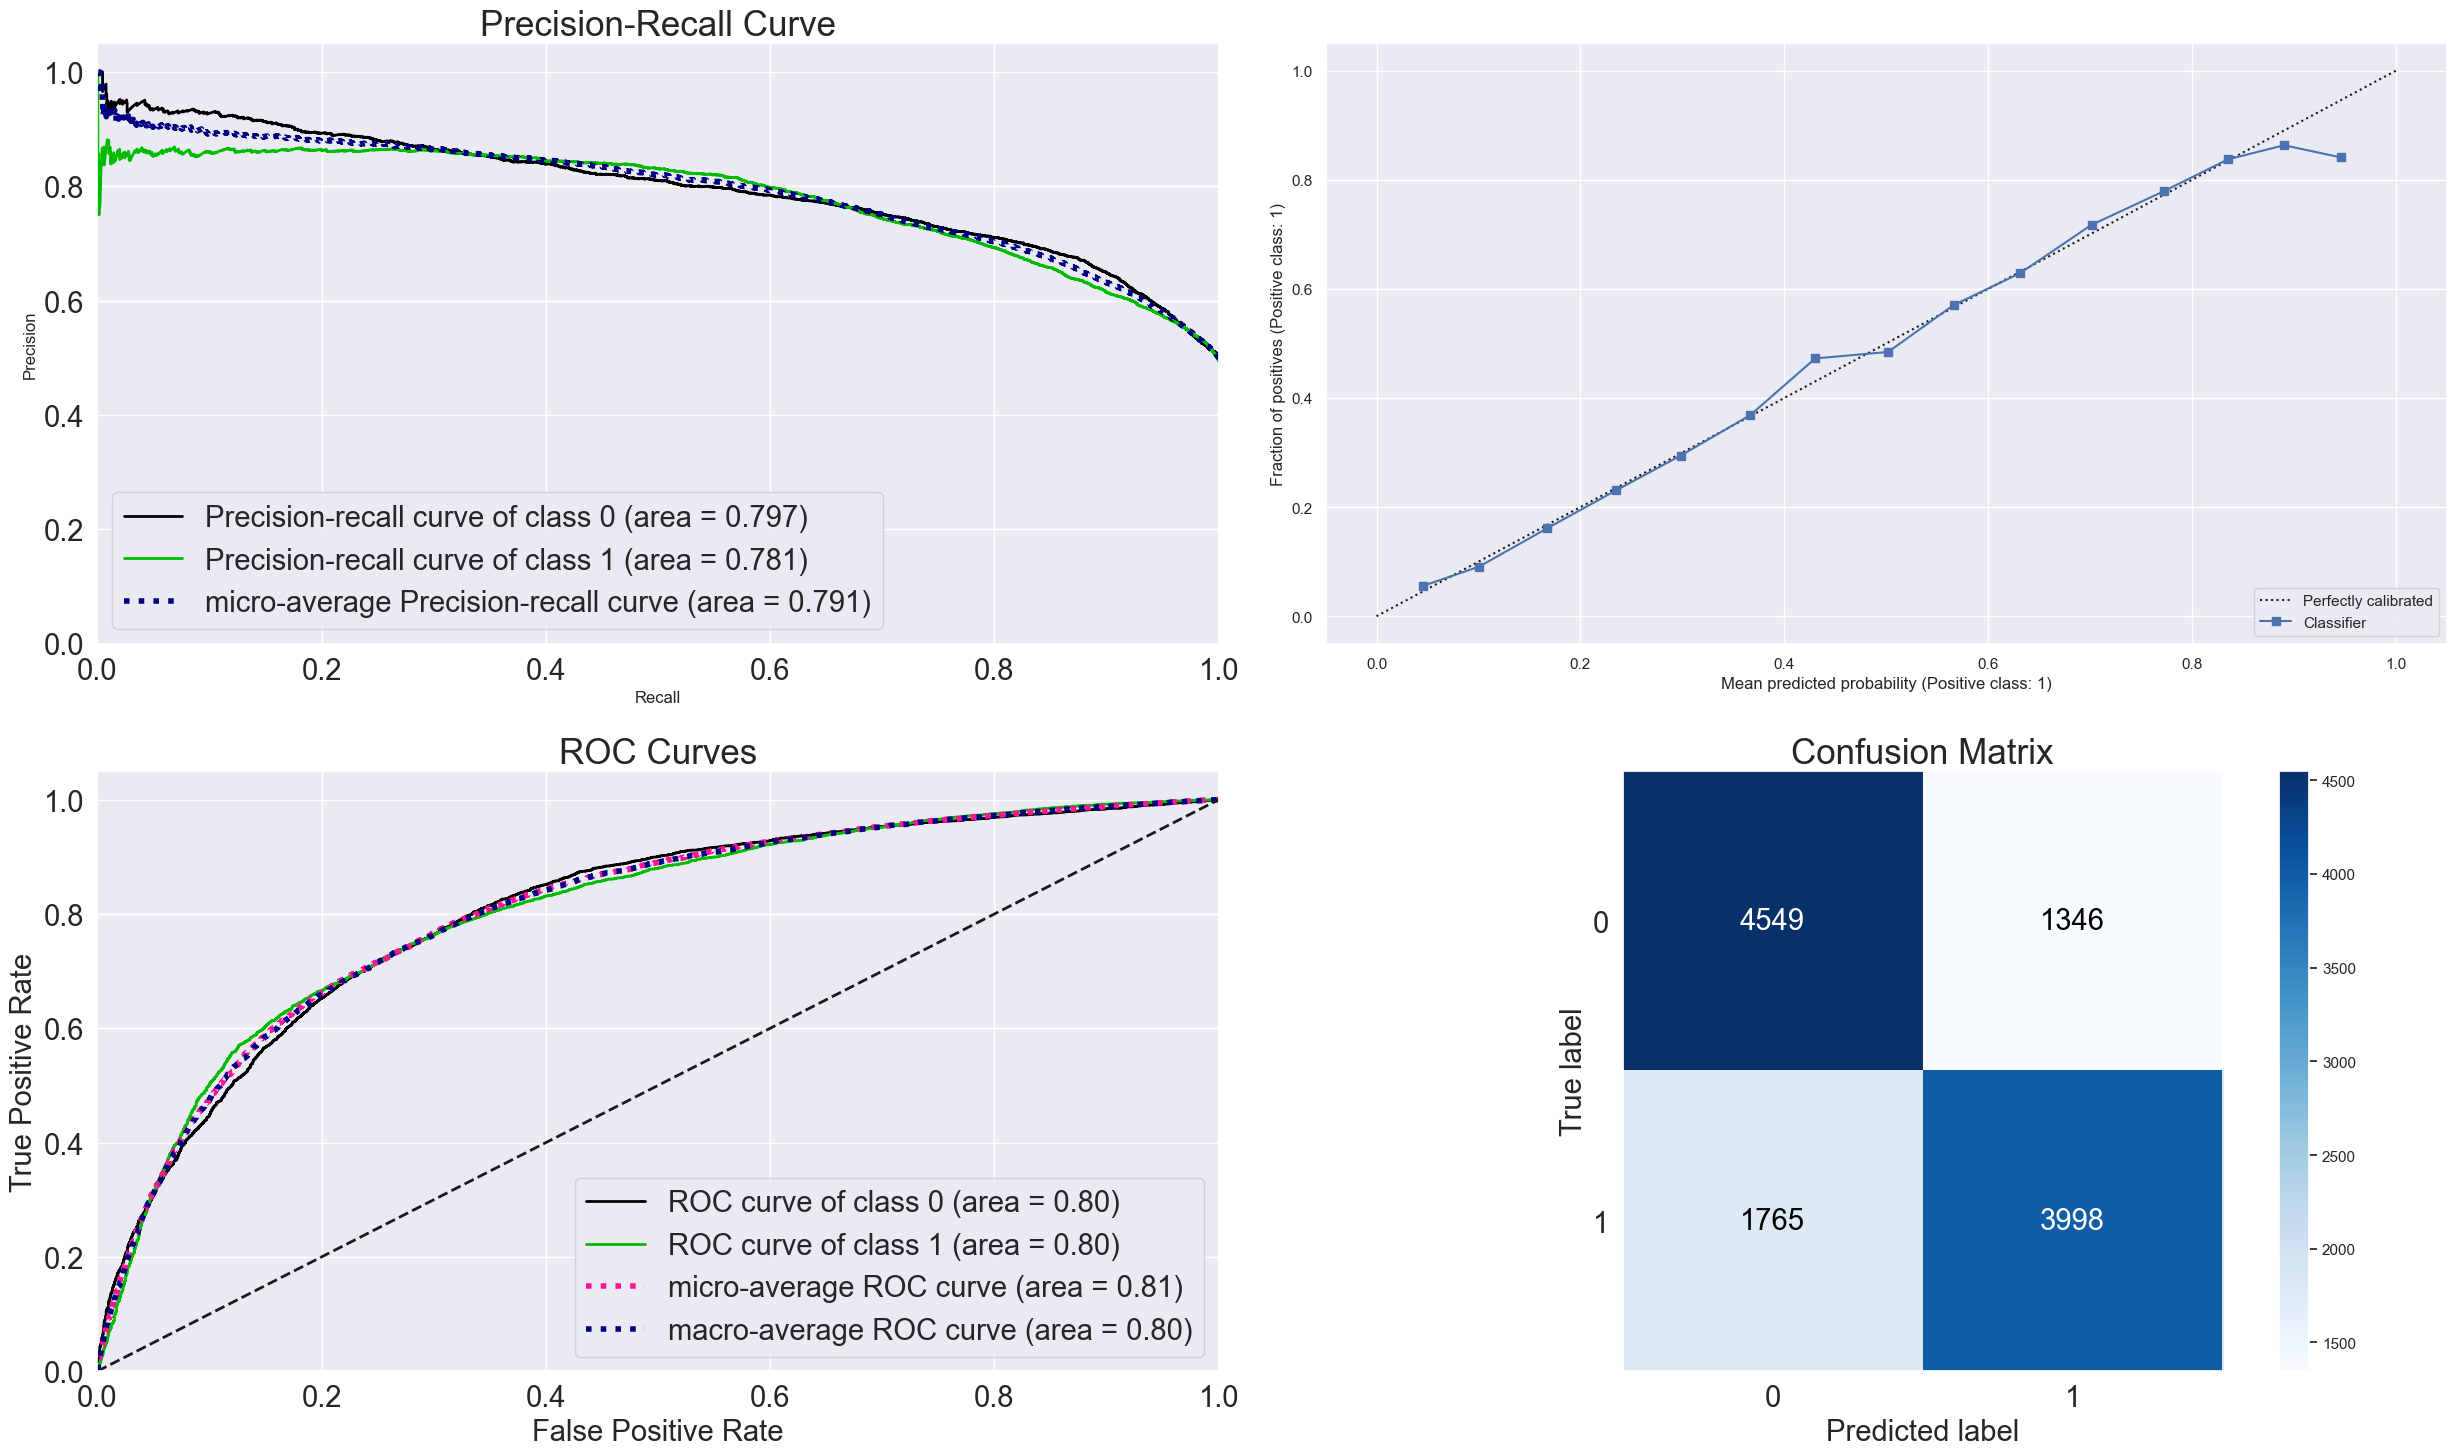

In [68]:
hf.classifier_metrics_plot(yhat_=yhat_catb , y_prob=y_prob_catb, y_true=y_val, bins=15)

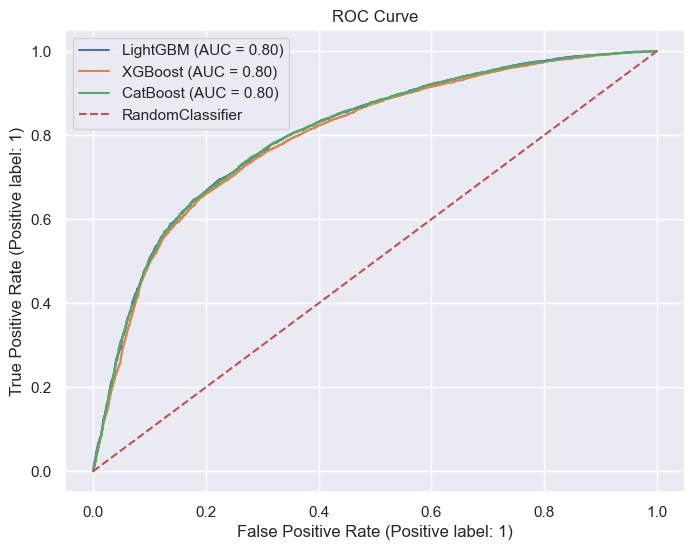

In [69]:
fig, axis = plt.subplots(1, 1, figsize=(8, 6))

met.RocCurveDisplay.from_predictions(y_val, y_prob_lgb[:, 1], ax=axis, name='LightGBM')

met.RocCurveDisplay.from_predictions(y_val, y_prob_xgb[:, 1], ax=axis, name='XGBoost')

met.RocCurveDisplay.from_predictions(y_val, y_prob_catb[:, 1], ax=axis, name='CatBoost')

axis.plot([0, 1], linestyle='--',label='RandomClassifier')
axis.legend()
axis.set_title('ROC Curve');

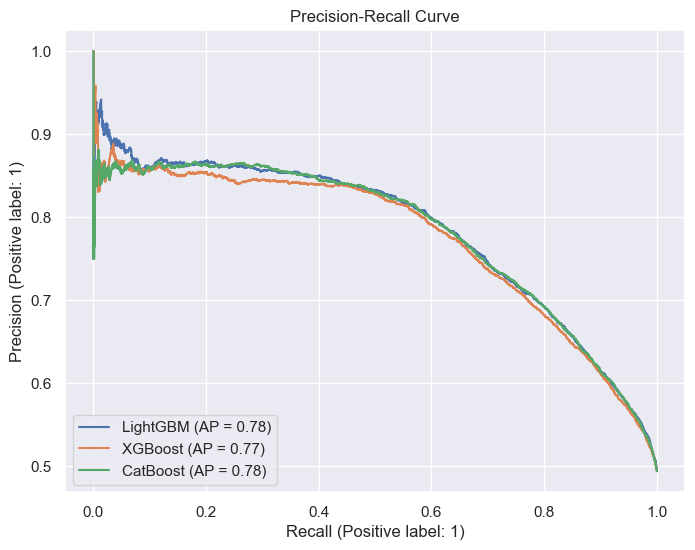

In [70]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

met.PrecisionRecallDisplay.from_predictions(y_val, y_prob_lgb[:, 1], ax=ax, name='LightGBM')

met.PrecisionRecallDisplay.from_predictions(y_val, y_prob_xgb[:, 1], ax=ax, name='XGBoost')

met.PrecisionRecallDisplay.from_predictions(y_val, y_prob_catb[:, 1], ax=ax, name='CatBoost')

ax.set_title('Precision-Recall Curve');


In [71]:
for clf, clf_name in [(lgb_pipe, 'LightGBM'), (xgb_pipe, 'XGBoost'), (catb_pipe, 'CatBoost')]:
    hf.classifiers_report(clf=clf, clf_name=clf_name, x_train=X_train, x_val=X_val, y_train=y_train, y_val=y_val)

LightGBM
              precision    recall  f1-score   support

           0       0.72      0.78      0.75      5895
           1       0.75      0.69      0.72      5763

    accuracy                           0.74     11658
   macro avg       0.74      0.73      0.73     11658
weighted avg       0.74      0.74      0.73     11658

XGBoost
              precision    recall  f1-score   support

           0       0.71      0.77      0.74      5895
           1       0.75      0.68      0.71      5763

    accuracy                           0.73     11658
   macro avg       0.73      0.73      0.73     11658
weighted avg       0.73      0.73      0.73     11658

CatBoost
              precision    recall  f1-score   support

           0       0.72      0.77      0.75      5895
           1       0.75      0.69      0.72      5763

    accuracy                           0.73     11658
   macro avg       0.73      0.73      0.73     11658
weighted avg       0.73      0.73      0.73     

## Cross Validated Metrics

The lower the number of K-folds, the higher the bias in the error estimates and less variance.
The higher the number of K-folds, the higher the error estimates variance and lower bias.

Now we compare the general performance of the three models using cross-validation. For this, we can use the  `cross_validate` function from scickit-learn, which allows us to pick multiple metrics with the `scoring` parameter.

In [72]:
#lgb_pipe = Pipeline([('preprocess', forest_preprocessor_all), ('lgmclassifier', lgb)])
scores_lgb = cross_validate(lgb_pipe, X, y, cv=5, scoring=['f1', 'recall', 'precision', 'accuracy', 'roc_auc', 'neg_brier_score'])

#xgb_pipe = Pipeline([('preprocess', forest_preprocessor_all), ('xgboost', xgb)])
scores_xgb = cross_validate(xgb_pipe, X, y, cv=5, scoring=['f1', 'recall', 'precision', 'accuracy', 'roc_auc', 'neg_brier_score'])

#catb_pipe = Pipeline([('preprocess', forest_preprocessor_all), ('catboost', catb)])
scores_catb = cross_validate(catb_pipe, X, y, cv=5, scoring=['f1', 'recall', 'precision', 'accuracy', 'roc_auc', 'neg_brier_score'])

In [73]:
crossval_performs = pd.concat([hf.scores_summary(scores_lgb, 'LightGBM'), hf.scores_summary(scores_xgb, 'XGBoost'), hf.scores_summary(scores_catb, 'Catboost')], axis=0)
crossval_performs

,fit_time,score_time,test_f1,test_recall,test_precision,test_accuracy,test_roc_auc,test_neg_brier_score
LightGBM,0.354 +/- 0.1672,0.074 +/- 0.0158,0.7207 +/- 0.0095,0.6917 +/- 0.0155,0.7524 +/- 0.0126,0.735 +/- 0.0085,0.8002 +/- 0.0081,-0.181 +/- 0.0035
XGBoost,1.0536 +/- 0.0528,0.0648 +/- 0.0026,0.7163 +/- 0.0101,0.6869 +/- 0.0182,0.7485 +/- 0.0109,0.7311 +/- 0.0078,0.7953 +/- 0.0065,-0.1837 +/- 0.0029
Catboost,10.9904 +/- 0.1445,0.1284 +/- 0.0034,0.72 +/- 0.009,0.6918 +/- 0.0176,0.7508 +/- 0.0079,0.7341 +/- 0.0061,0.8001 +/- 0.0071,-0.1813 +/- 0.0032


LightGBM has the best performance between the three models, so that is the model that is going to be used for this project.

In [106]:
df_to_image(crossval_performs.reset_index().rename(columns={'index': 'classifier'}), head_color='royalblue', table_color='snow')

# 9.0 Fine Tunning Cross-Validation With Optuna

In [74]:
#warnings.filterwarnings('ignore')

In [75]:
# Define objective function to be optimized by optuna
#def objective(trial, x, y):
#
#    # Defining the parameters of the model
#    param = {
#            'objective': 'binary',
#
#            'verbosity': -1,
#
#            'boosting_type': 'gbdt',
#
#            'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 100, log=True),  # L1
#
#            'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 100, log=True),  #L2
#
#            'num_leaves': trial.suggest_int('num_leaves', 20, 3000, step=20),
#
#            'max_depth': trial.suggest_int('max_depth', 3, 12),
#
#            'min_child_samples': trial.suggest_int('min_child_samples', 200, 10000, step=100),
#
#            'n_estimators': trial.suggest_int('n_estimators', 1000, 10000, step=500),
#            
#            'learning_rate': trial.suggest_float('learning_rate', 1e-4, 0.3, log=True),
#
#            'min_split_gain': trial.suggest_float('min_split_gain', 0, 20),
#
#            'subsample': trial.suggest_float('subsample', 0.2, 0.95, step=0.1),  # bagging_fraction
#
#            'subsample_freq': trial.suggest_categorical('subsample_freq', [5]),  # bagging_freq
#
#            'colsample_bytree': trial.suggest_float('colsample_bytree', 0.2, 0.95, step=0.1)} # features_frac
#
#    lgbm = LGBMClassifier(**param, random_state=seed)
#    pipe_gbm = Pipeline([('preprocessor', forest_preprocessor_all), ('lgbmclassifier', lgbm)])
#
#    scores = cross_val_score(pipe_gbm, x, y, cv=5, scoring='f1')
#    score = scores.mean()
#    return score

In [76]:
#sampler = TPESampler(seed=42)
#study = optuna.create_study(direction='maximize', sampler=sampler)
#study.optimize(lambda trial: objective(trial, X, y), n_trials=200)
#
#print(f'Number of finished trials: {len(study.trials)}')
#print('Best trial')
#trial = study.best_trial
#
#print(f'Value {trial.value}')
#print('Params: ')
#for key, value in trial.params.items():
#    print(f'{key}: {value}')

In [77]:
#Number of finished trials: 200
#Best trial
#Value 0.7233645321060098
#Params: 
#reg_alpha: 5.534644469170856e-07
#reg_lambda: 1.652448879623026e-06
#num_leaves: 140
#max_depth: 12
#min_child_samples: 900
#n_estimators: 4500
#learning_rate: 0.004800857553432935
#min_split_gain: 0.8735724237666136
#subsample: 0.4
#subsample_freq: 5
#colsample_bytree: 0.9

# 10. Tuned LightGBM Evaluation

In [78]:
path = 'data/cardio_test.csv'
X_test, y_test = hf.test_set(path)


In [79]:
#Value 0.7233645321060098
params = {
            'reg_alpha': 5.534644469170856e-07,
            'reg_lambda': 1.652448879623026e-06,
            'num_leaves': 140,
            'max_depth': 12,
            'min_child_samples': 900,
            'n_estimators': 4500,
            'learning_rate': 0.004800857553432935,
            'min_split_gain': 0.8735724237666136,
            'subsample': 0.4,
            'subsample_freq': 5,
            'colsample_bytree': 0.9
            }

lgbm_tuned_pipe = Pipeline(steps=[('preprocess', forest_preprocessor_all), ('lgbmclassifier_tuned',LGBMClassifier(**params))])

lgbm_tuned_pipe.fit(X, y)

y_hat_tuned = lgbm_tuned_pipe.predict(X_test)
y_prob_tuned = lgbm_tuned_pipe.predict_proba(X_test)

## 10.1. Confusion Matrix

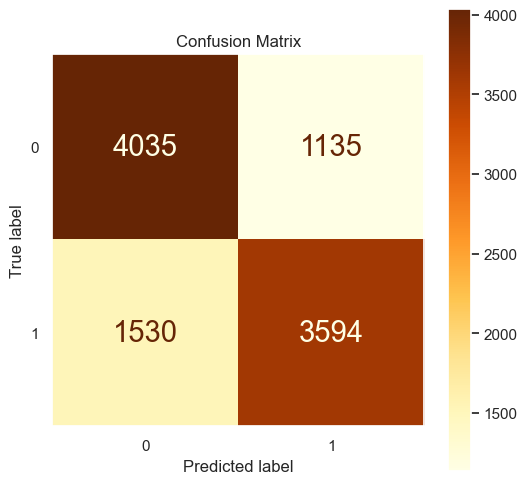

In [80]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
cm = met.confusion_matrix(y_test, y_hat_tuned)

ax.grid(False)
disp = met.ConfusionMatrixDisplay(cm, display_labels=lgbm_tuned_pipe.classes_)
disp.plot(cmap='YlOrBr', ax=ax)
ax.set_title('Confusion Matrix');

## 10.2. ROC Curve

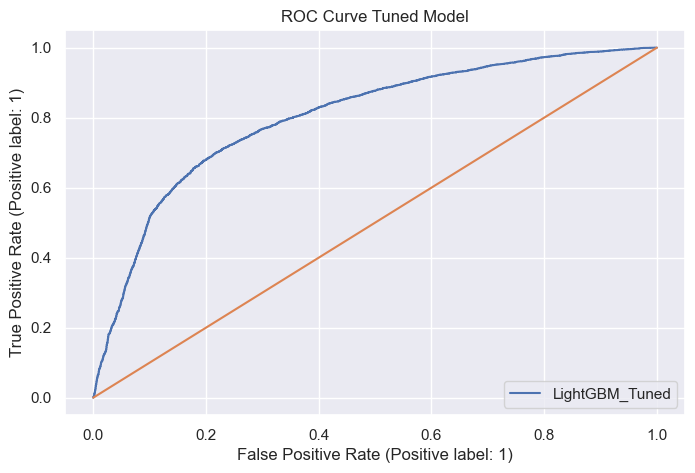

In [81]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
met.RocCurveDisplay.from_predictions(y_test, y_prob_tuned[:, 1], ax=ax, label='LightGBM_Tuned')
ax.plot([0, 1])
ax.set_title('ROC Curve Tuned Model')

plt.show()

In [82]:
precision, recall, thresholds = met.precision_recall_curve(y_test, y_prob_tuned[:, 1])

f1_score = (2 * precision * recall)/(precision + recall)
f1_score_r = [item if not(np.isnan(item)) else 0 for item in f1_score ]

ix = np.argmax(f1_score_r)

print(f'Best Threshold={thresholds[ix]}, F-Score={f1_score[ix]} Precsion: {precision[ix]}, Recall:{recall[ix]}')


Best Threshold=0.4006683912720948, F-Score=0.7431985294117648 Precsion: 0.7023974982626824, Recall:0.789032006245121


In [83]:
index = np.argwhere(precision>=0.754)[0][0]
print(f'Best Threshold={thresholds[index]}, F-Score={f1_score[index]} Precsion: {precision[index]}, Recall:{recall[index]}')

Best Threshold=0.4894801280866697, F-Score=0.7318935208437972 Precsion: 0.7540881805009315, Recall:0.710967993754879


## 10.3. Precision Recall Curve

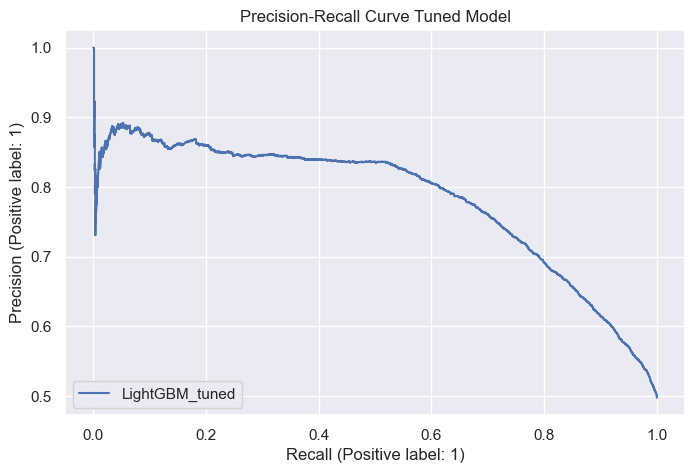

In [84]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
met.PrecisionRecallDisplay.from_predictions(y_test, y_prob_tuned[:, 1], ax=ax, label='LightGBM_tuned')
ax.set_title('Precision-Recall Curve Tuned Model');

## 10.4. Checking the Calibration

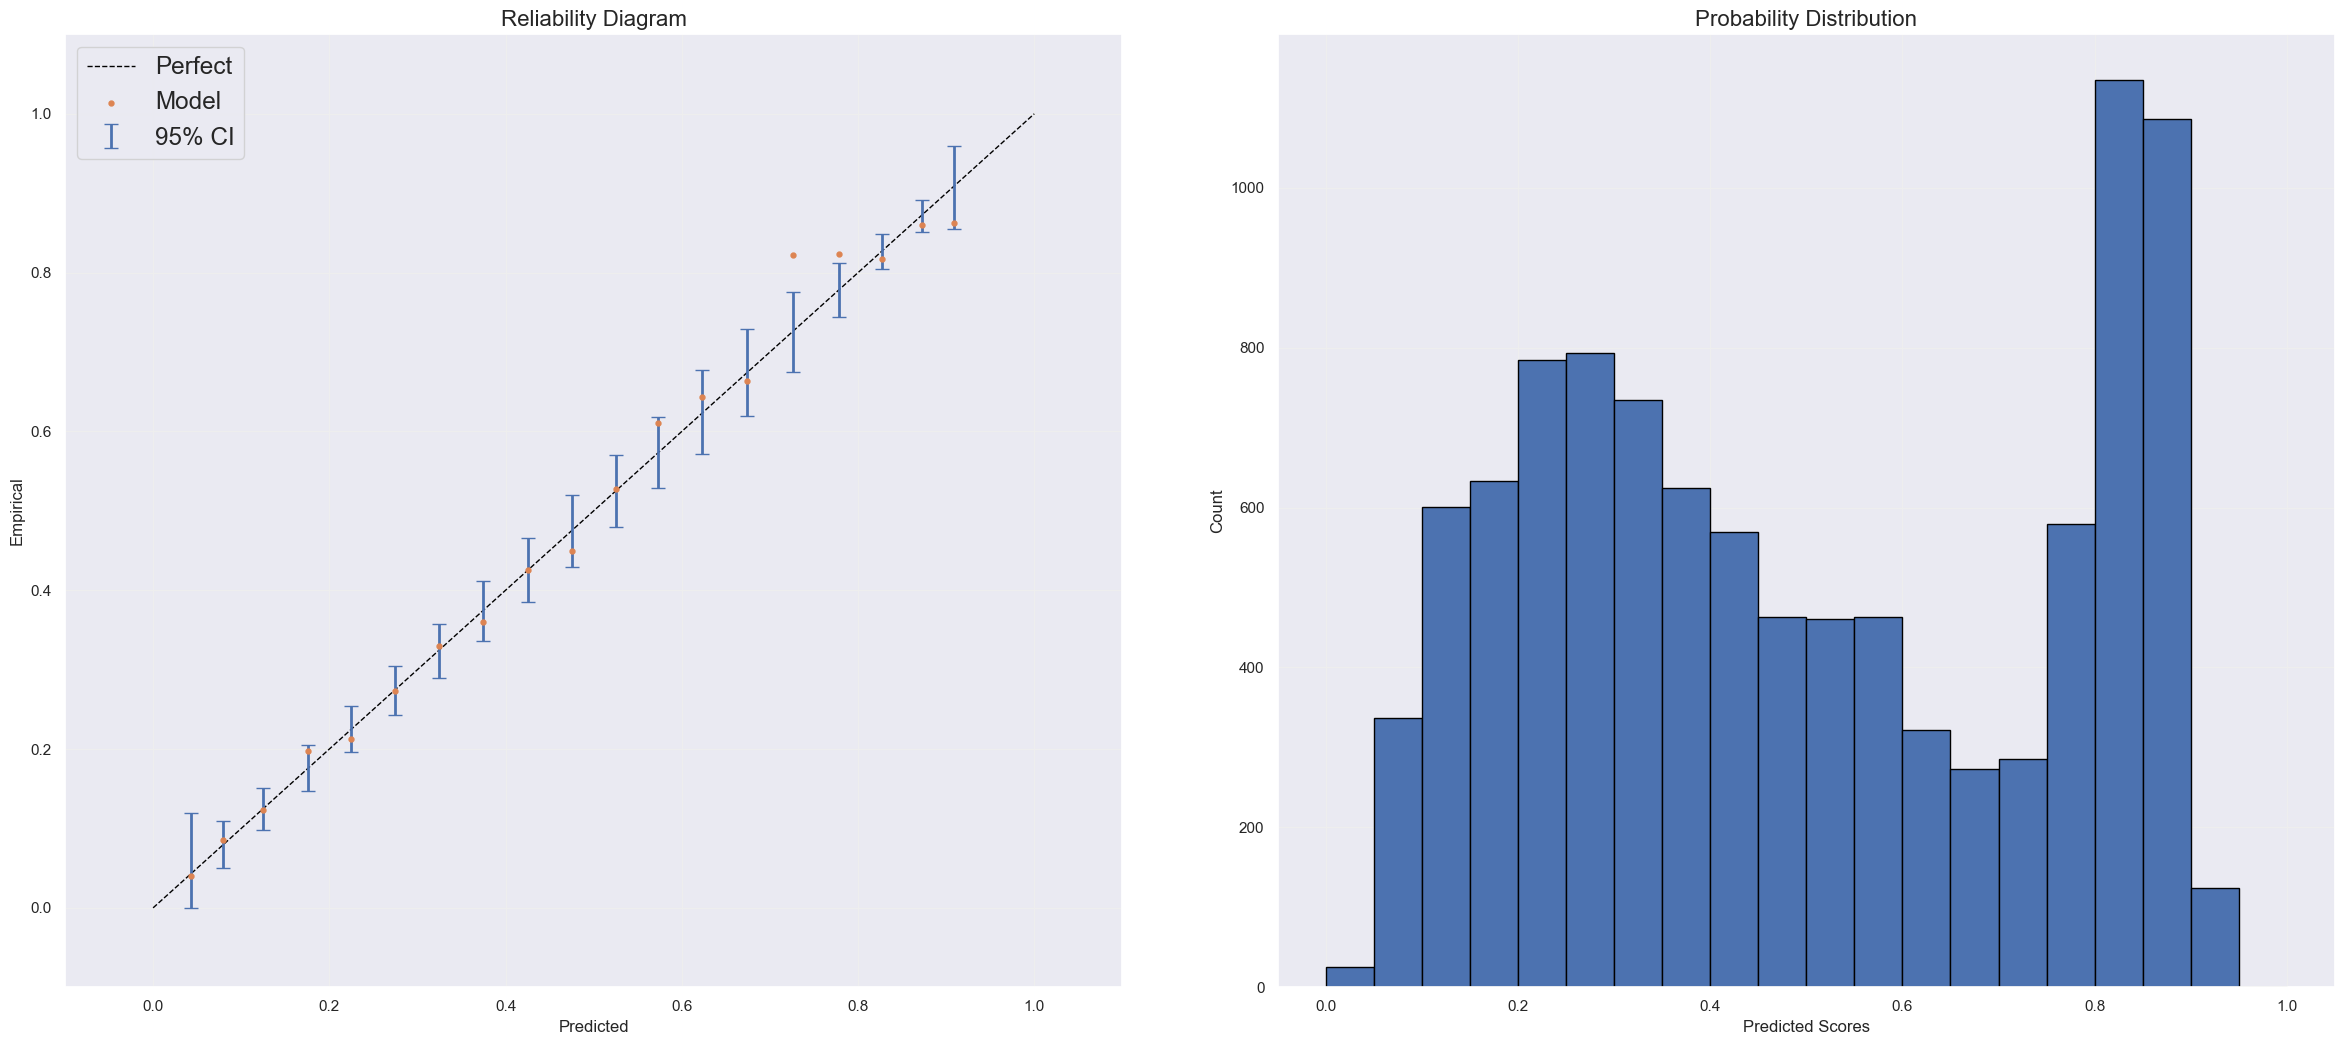

In [85]:
mli.plot_reliability_diagram(y_test, y_prob_tuned[:,1], show_histogram=True );


If the dot is above the perfectly calibrated line, the model is under-predicting the true probability. If the dot is below the line, the model is over predicting the true probability.

## 10.5. Metrics

In [86]:
metrics_tuned = hf.classifier_metrics_tuned('LightGBM_tuned', y_test, y_hat_tuned, y_prob_tuned)
pd.io.formats.style.Styler(metrics_tuned, precision=6)

,accuracy,brier_loss,f1_score,precision,recall,roc_auc
LightGBM_tuned,0.741111,0.179663,0.729524,0.759992,0.701405,0.802424


In [107]:
df_to_image(metrics_tuned.reset_index().rename(columns={'index': 'classifier'}), head_color='royalblue', table_color='snow')

**Saving the model pipeline**

In [87]:
#pickle.dump(lgbm_tuned_pipe, open('model//lgbm_classifier_tuned_pipe.pkl', 'wb'))

# 11.0. Model Calibration

From the previous section we could observe that our model is heavily miscalibrated.
For the problem — cardio disease diagnostic — being handled on this project, we are interested in the actual probability of a person having a heart disease. For that reason it is important to calibrate our model.


In [88]:
uncalibrated_model = pickle.load(open('model//lgbm_classifier_tuned_pipe.pkl', 'rb'))

In [89]:
lgbm_untrained = Pipeline([('preprocessor', forest_preprocessor_all), ('lgmt_tuned_classifier', LGBMClassifier(**params))])

calibrated_model = CalibratedClassifierCV(uncalibrated_model, method='isotonic', cv=5)
calibrated_model.fit(X, y)

y_hat_calib = calibrated_model.predict(X_test)
y_prob_calib = calibrated_model.predict_proba(X_test)

y_prob_uncalib = uncalibrated_model.predict_proba(X_test)

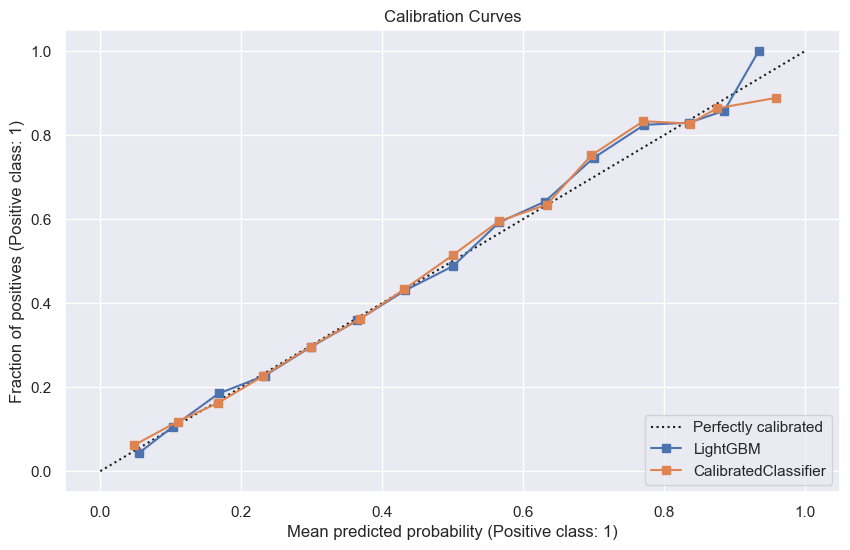

In [90]:
fig, axis = plt.subplots(1, 1, figsize=(10, 6))

CalibrationDisplay.from_predictions(y_test, y_prob_uncalib[:, 1], n_bins=15, ax=axis, label='LightGBM')
CalibrationDisplay.from_predictions(y_test, y_prob_calib[:, 1], n_bins=15, ax=axis, label='CalibratedClassifier')
axis.set_title('Calibration Curves')
plt.show()

Visually, the calibrated model seems better for probabilities below 50%. For probabilities above 50%, the original classifier looks a bit better than the calibrated one.

There are a few metrics we can use to assess how well the model is calibrated of a model. Here brier loss, a commonly used metric, will be used to compare the calibrated and the original classifier.
Brier loss is the mean squared error applied directly to probabilities; a low brier loss means the model is well-calibrated. 

In [91]:
hf.calibration_metrics_comp(y_test, y_calib=y_prob_calib[:, 1], y_uncalib=y_prob_uncalib[:, 1])

,Uncalibrated,Calibrated
brier_score_loss,0.179663,0.179782


As we can see, the brier score is larger for the calibrated classifier, which is not a good thing since the lower, the better for this metric.

## 11.1. Calibrated Confusion Matrix

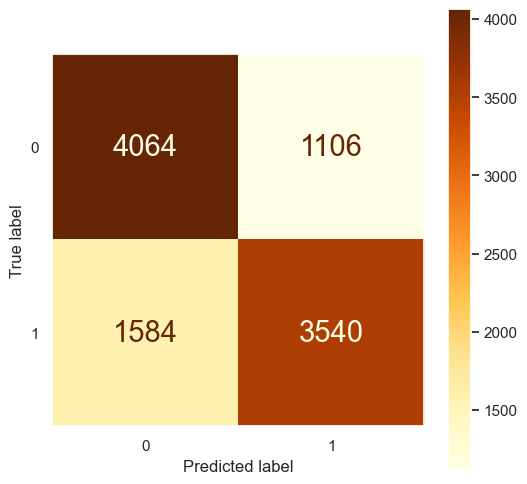

In [92]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
cm = met.confusion_matrix(y_test, y_hat_calib)

ax.grid(False)
disp = met.ConfusionMatrixDisplay(cm, display_labels=calibrated_model.classes_)
disp.plot(cmap='YlOrBr', ax=ax)

## 11.2. Calibrated Model Metrics

In [93]:
metrics_calib = hf.classifier_metrics_tuned('CalibratedClassifier', y_test, y_hat_calib, y_prob_calib)
pd.io.formats.style.Styler(metrics_calib, precision=6)

,accuracy,brier_loss,f1_score,precision,recall,roc_auc
CalibratedClassifier,0.738683,0.179782,0.724667,0.761946,0.690867,0.802159


In [108]:
df_to_image(metrics_calib.reset_index().rename(columns={'index': 'classifier'}), head_color='royalblue', table_color='snow')

The calibrated classifier has better f1 and recall scores, but the other metrics are worse.

# 12.0. Business Performance

At the beginning of this project, I divided the data into two datasets, one for developing the model and another for testing (new data).
The test set will be assumed as new patients, and we will assess the business performance based on this data.

In [94]:
X_test.shape[0]

10294

In [95]:
c_performance = hf.performance(worst_precision=0.55, best_precision=0.65, num_patients=X_test.shape[0], cost_per_patient=900)
c_performance

,precision,diagnostic_price,num_of_patients,cost,revenue,profit
Worst Scenario,0.5500,R$500.00,10294.0,"R$9,264,600.00","R$5,147,000.00","R$-4,117,600.00"
Best Scenario,0.6500,"R$1,500.00",10294.0,"R$9,264,600.00","R$15,441,000.00","R$6,176,400.00"


In [109]:
df_to_image(c_performance.reset_index().rename(columns={'index': 'scenario'}), head_color='royalblue', table_color='snow')

**Precision with Confidence Interval to estimate the business performance**

Now we calculate the confidence interval for the precision of the model with 95% confidence level, to see the worst and best case scenario for the business.

In [96]:
np.random.seed=42
true = y_test.copy()
pred = pd.Series(y_hat_tuned).copy()

metrics = [hf.one_boot(true, pred) for i in range(100000)]
up_limit = np.quantile(metrics, 0.975)
lo_limit = np.quantile(metrics, 0.025)

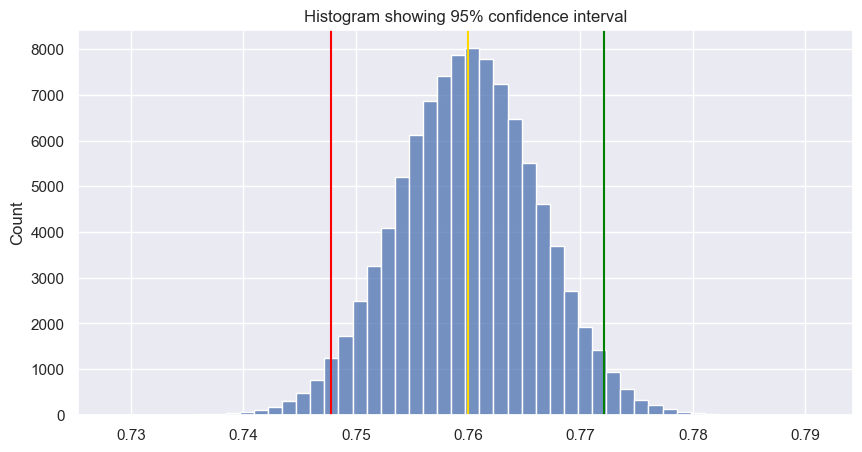

In [97]:
plt.figure(figsize=(10, 5))
sns.histplot(metrics, bins=50)
plt.axvline(np.mean(metrics), color='gold')
plt.axvline(up_limit, color='green')
plt.axvline(lo_limit, color='red')
plt.title('Histogram showing 95% confidence interval');

In [98]:
busi_perform = hf.performance(worst_precision=lo_limit , best_precision=up_limit, num_patients=X_test.shape[0], cost_per_patient=900)
busi_perform 

,precision,diagnostic_price,num_of_patients,cost,revenue,profit
Worst Scenario,0.7478,"R$2,000.00",10294.0,"R$9,264,600.00","R$20,588,000.00","R$11,323,400.00"
Best Scenario,0.7721,"R$2,500.00",10294.0,"R$9,264,600.00","R$25,735,000.00","R$16,470,400.00"


In [110]:
df_to_image(busi_perform.reset_index().rename(columns={'index': 'scenario'}), head_color='royalblue', table_color='snow')

The worst scenario for the new solution is better than the best scenario of the current process. If implemented, the new process will have a $1100.00 profit per diagnostic in the worst-case scenario. Whilst the current process has a profit of $600.00 per diagnostic in the best case, which means at least an 83.33% increase in profit per diagnostic. 

references: 

https://wttech.blog/blog/2021/a-guide-to-model-calibration/

https://machinelearningmastery.com/calibrated-classification-model-in-scikit-learn/

https://towardsdatascience.com/a-comprehensive-guide-on-model-calibration-part-1-of-4-73466eb5e09a

https://pibieta.github.io/imbalanced_learning/notebooks/Calibration.html

# 13.0. Cardio Vascular Diseases

## Heart Disease

Heart and blood vessel diseases include numerous problems usually related to a process named atherosclerosis.
Atherosclerosis is when a substance called plaque builds up in the walls of the arteries and narrows them. This condition makes it harder for the blood to flow and can form a blood clot that can block the blood flow. This causes a heart attack or stroke.

### Heart Attack

Occurs when the blood flow to part of the heart is blocked by a blood clot. If the blood flow is completely cutted from a part of the heart, the muscle supplied by that artery begins to die.

### Stroke

An ischemic stroke occurs when a blood vessel that feeds the brain gets blocked by a blood clot. Some brain cells begin to die.

Hemorrhagic stroke occurs when a blood vessel within the brain bursts. This is mostly caused by uncontrolled hypertension.

### Heart Failure

The heart doesn't pump the blood as well as it should. The body's need for blood oxygen is not being met.

### Arrhythmia

Abnormal heart rhythm, the heart can beat too slow, too fast, or irregularly. This is caused by a problem with your heart's electrical conduction system.
Bradycardia ->  heart rate too slow, less than 60 beats per minute.
Tachycardia -> heart rate too fast, more than 100 beats per minute.

Cause 
    Cardiomyopathy (enlarged heart muscle), coronary artery disease, diabetes, drug misuse, emotional stress.
    Excessive use of alcohol or caffeine, congenital heart problems, high blood pressure
    Smoking, heart valve disease,  medications (supplements).

### Heart Valve Problems

The heart valves don't open enough, so this doesn't allow the blood to flow as it should.
When the heart valves don't close properly and allow blood to leak through (regurgitation).
Prolapse -> the valve leaflets bulge or prolapse into the upper chamber.

### Coronary artery disease

Build up of fatty plaques in the arteries
    Risk factor -> poor diet, lack of exercise, obesity, and smoking.


## Diagnostic

The doctor will perform a physical exam and ask questions about the symptoms, personal health, and family health history. They may also perform several tests and procedures.

Common tests

Blood Work -> measures substances  — cholesterol, blood sugar levels, and specific proteins — that indicate cardiovascular health. It also can be used to check for blood clotting.

Ankle-brachial index (ABI) -> Compares the blood pressure in your ankles and arms to diagnose peripheral artery disease.

Electrocardiogram (EKG) -> records your heart's electrical activity.
Ambulatory monitoring -> devices that track your heart rhythm and rates.

Ultrasound -> Uses sound waves to check blood flow in your legs or neck.

Cardiac magnetic resonance imaging (MRI) -> magnets and radio waves to create highly detailed images of your heart.

MR angiogram or CT angiogram -> Uses an MRI or CT, respectively, to see blood vessels in your legs, head, and neck.

Stress tests -> analyze how physical activity affects your heart in a controlled setting.

Cardiac Catheterization -> uses a catheter to measure pressure and blood flow in your heart.

# Test API

In [2]:
import requests

In [3]:
testing = pd.read_csv(r'E:\users\b_tc\Comunidade_DS\repos_ds\CARDIO_CATCH_DISEASE_FIN\data\cardio_test.csv').loc[:10, :'active']
testing

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,66728,21770,1,156,64.0,140,80,2,1,0,0,1
1,69098,21876,1,170,85.0,160,90,1,1,0,0,1
2,59185,23270,1,151,90.0,130,80,1,1,0,0,1
3,49288,19741,1,159,97.0,120,80,1,1,0,0,1
4,62481,18395,1,164,68.0,120,80,1,1,0,0,1
5,16605,20499,2,184,78.0,120,80,1,1,0,0,1
6,35209,16019,1,163,60.0,120,80,1,1,0,0,1
7,32015,18255,2,176,75.0,130,90,1,1,0,0,0
8,1307,23406,2,175,90.0,160,80,3,3,0,0,1
9,80437,21021,1,145,56.0,150,80,2,1,0,0,1


In [4]:
url = 'https://cardio-app.onrender.com//predictions'
header = {'Content-Type': 'application/json'}
testing = pd.read_csv(r'E:\users\b_tc\Comunidade_DS\repos_ds\CARDIO_CATCH_DISEASE_FIN\data\cardio_test.csv').loc[:, :'active']

json = testing.to_dict(orient='records')

js = requests.post(url, json=json, headers=header)

In [113]:
js.status_code

200

In [114]:
pred = pd.DataFrame(js.json())['proba_predictions']
predictions = pd.concat([testing, pred], axis=1)

predictions

,id,age,gender,height,weight,systolic_pressure,diastolic_pressure,cholesterol,glucose,smoke,alcohol_intake,active,bmi,weight_condition,blood_pressure_level,proba_predictions
0,66728,59,female,156,64.0,140,80,above_normal,normal,0,0,1,26.298488,overweight,high_stage_1,0.844647
1,69098,59,female,170,85.0,160,90,normal,normal,0,0,1,29.411765,overweight,high_stage_2,0.850970
2,59185,63,female,151,90.0,130,80,normal,normal,0,0,1,39.471953,obesity_class1,high_stage_1,0.652666
3,49288,54,female,159,97.0,120,80,normal,normal,0,0,1,38.368735,obesity_class1,normal,0.432001
4,62481,50,female,164,68.0,120,80,normal,normal,0,0,1,25.282570,overweight,normal,0.194793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10289,96561,61,male,178,96.0,130,80,above_normal,normal,0,0,1,30.299205,obesity_class1,high_stage_1,0.649771
10290,61046,45,female,158,81.0,120,80,normal,normal,0,0,1,32.446723,obesity_class1,normal,0.275572
10291,35144,58,female,165,84.0,150,95,normal,normal,0,0,0,30.853994,obesity_class1,high_stage_2,0.850115
10292,52865,54,female,160,65.0,120,80,normal,normal,0,0,1,25.390625,overweight,normal,0.335740
